In [37]:
import importlib
import globalfunc
importlib.reload(globalfunc)
from globalfunc import *

### 1| Spectra <a name="spectra"></a>

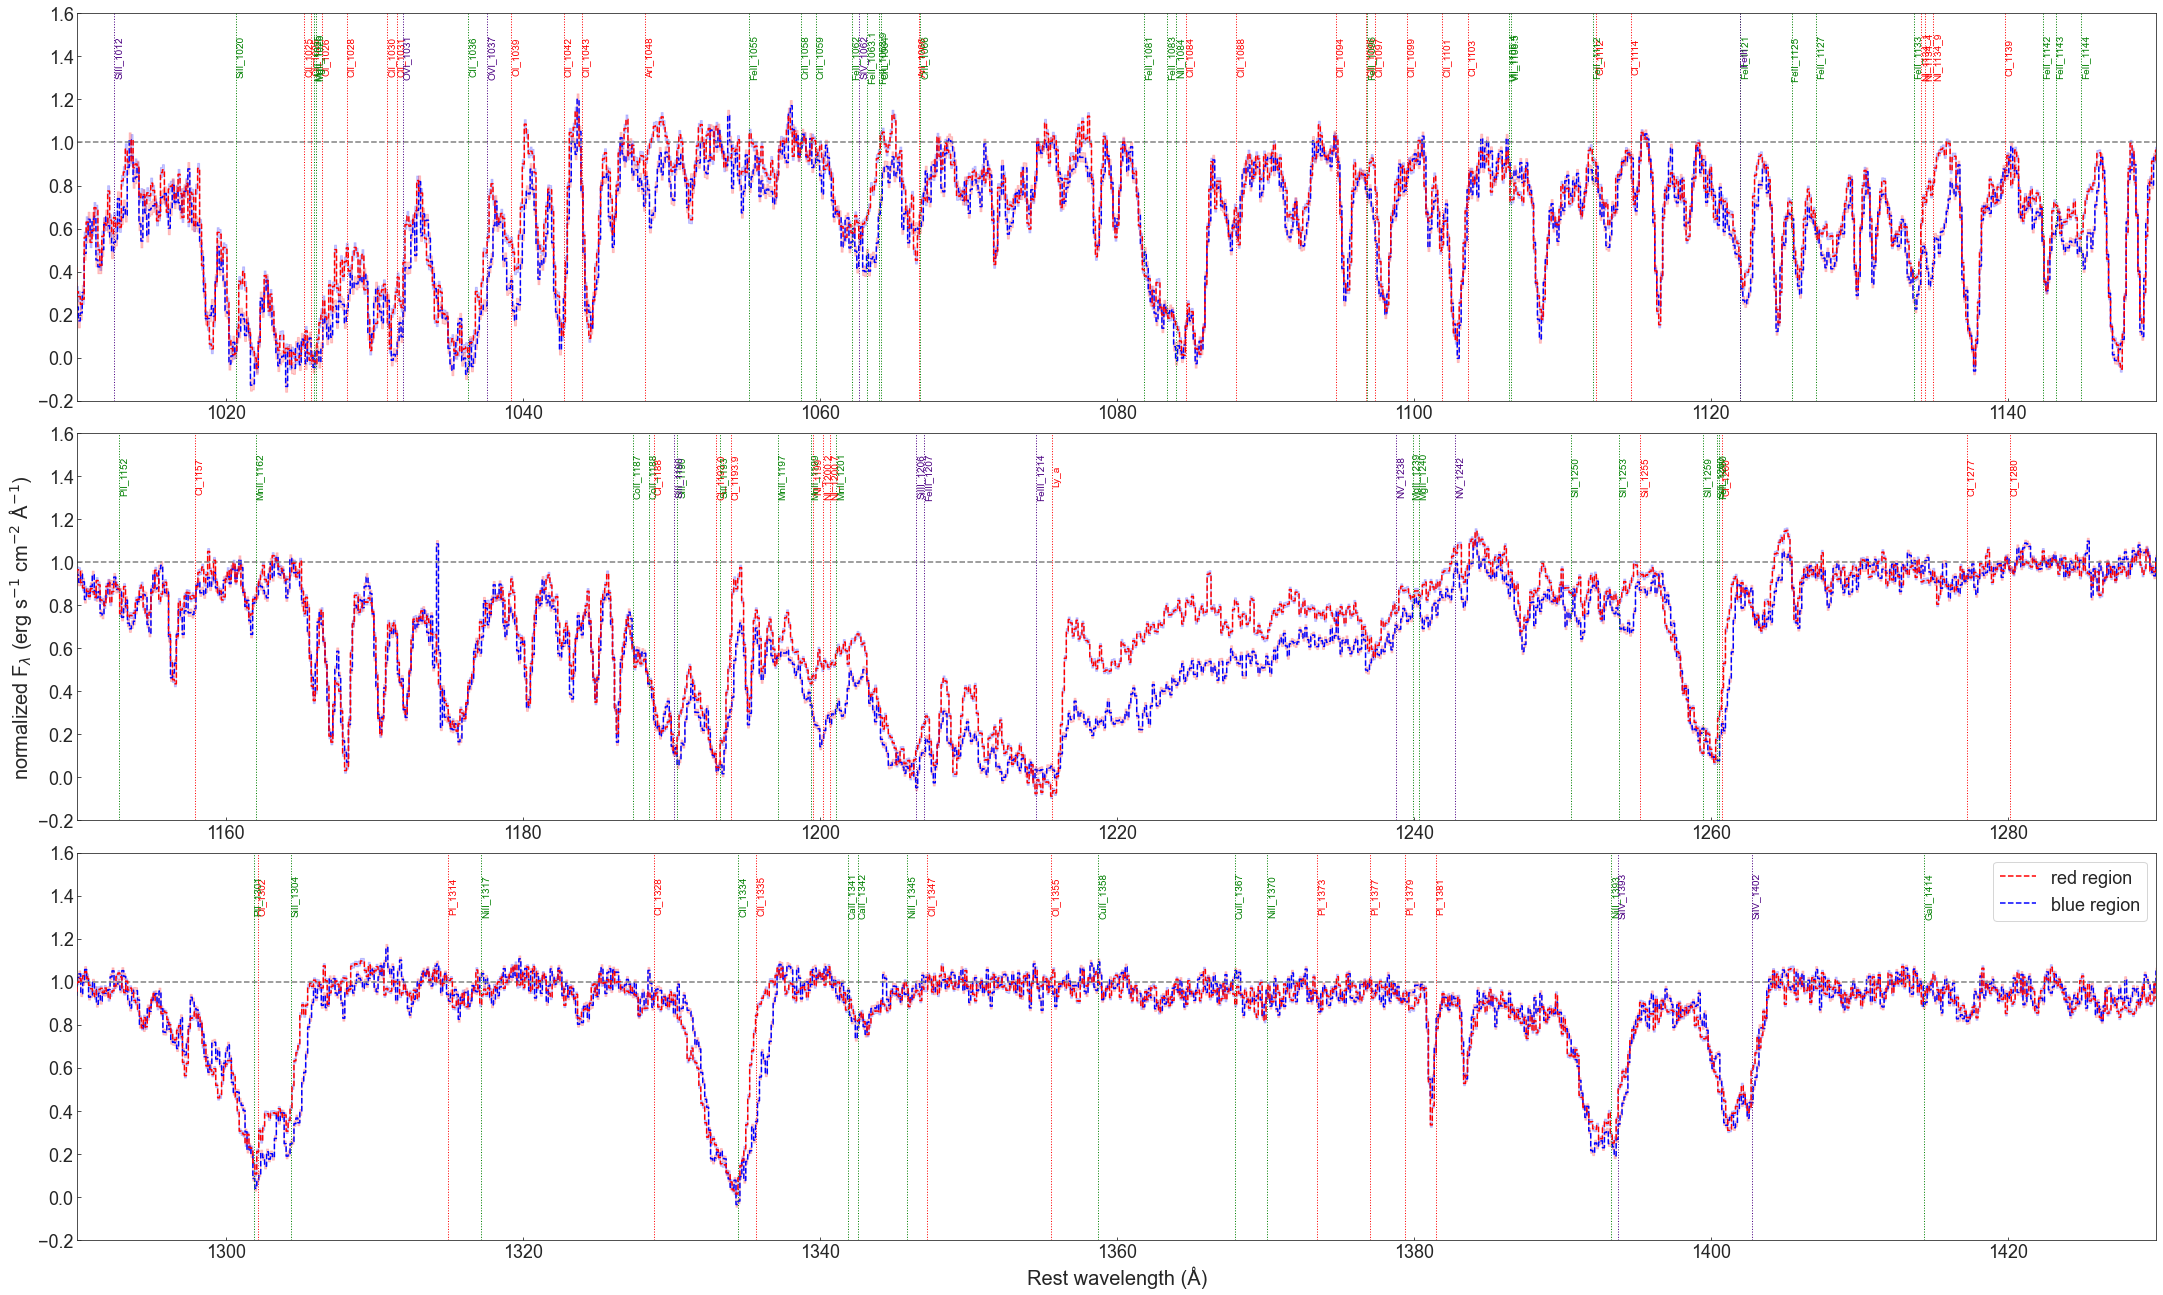

In [38]:
# plotting the spectra

fig, ax = plt.subplots(3,1,figsize=(30, 18),
                   #   dpi=450 
                        )

for i in range(3):
    ax[i].plot(nwavelength, rnorm, drawstyle="steps-mid", color=ap0color,ls = '--', zorder=3, label = 'red region')
    ax[i].fill_between(nwavelength, rnorm-rnorm_err, rnorm+rnorm_err, step='mid', color=ap1color, alpha =0.2)
    ax[i].plot(nwavelength, bnorm, drawstyle="steps-mid", color=ap1color,ls = '--', zorder=2, label = 'blue region')
    ax[i].fill_between(nwavelength, bnorm-bnorm_err, bnorm+bnorm_err, step='mid', color=ap0color, alpha =0.2)
    ax[i].axhline(y=1, color='gray',ls = '--')

    for line in rlines.items():
        ax[i].axvline(line[1], linestyle=":", color="red", lw=1)
        ax[i].text(line[1],1.4, line[0],color="red",rotation=90, verticalalignment='center',clip_on=True)
    for line in glines.items():
        ax[i].axvline(line[1], linestyle=":", color="green", lw=1)
        ax[i].text(line[1],1.4, line[0],color="green",rotation=90, verticalalignment='center',clip_on=True)
    for line in tlines.items():
        ax[i].axvline(line[1], linestyle=":", color="indigo", lw=1)
        ax[i].text(line[1],1.4, line[0],color="indigo",rotation=90, verticalalignment='center',clip_on=True)


# define the wavelength limits for each subplot
ax[0].axis([1010,1150,-0.2,1.6])
ax[1].axis([1150,1290,-0.2,1.6])
ax[2].axis([1290,1430,-0.2,1.6])

plt.xlabel("Rest wavelength (Å)", fontsize=20)
ax[1].set_ylabel("normalized F$_{\\lambda}$ (erg s$^{-1}$ cm$^{-2}$ Å$^{-1}$)", fontsize=20)
plt.tight_layout()
plt.legend()
plt.savefig('improved.png')
plt.show() 

### 2| Velocity profiles
#### 2.1| Profiles for strong lines > Lya (both regions)

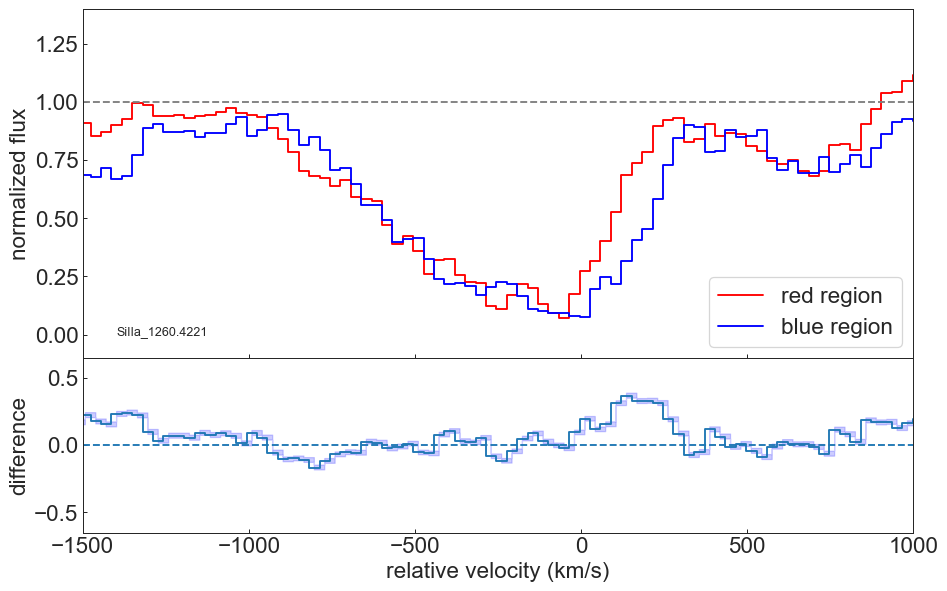

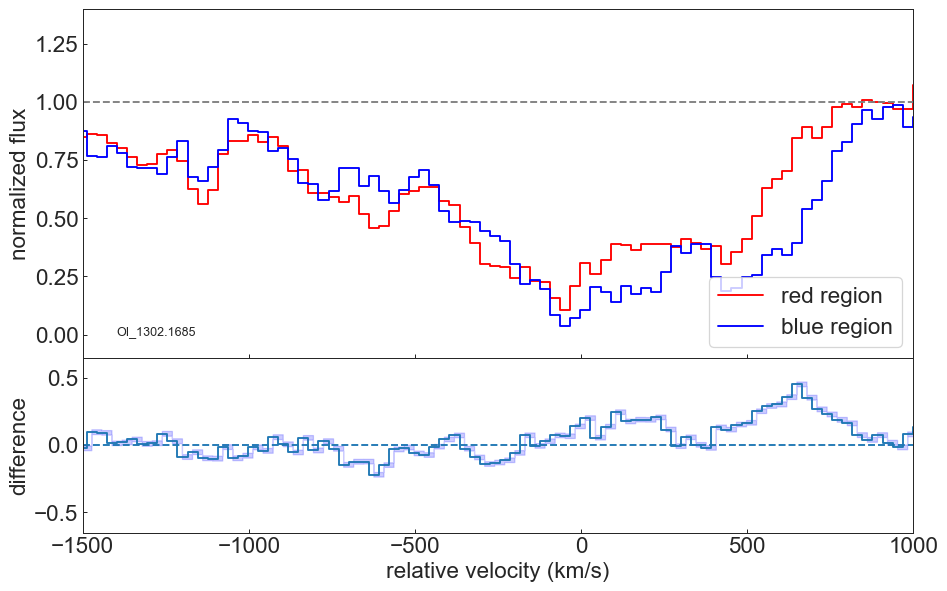

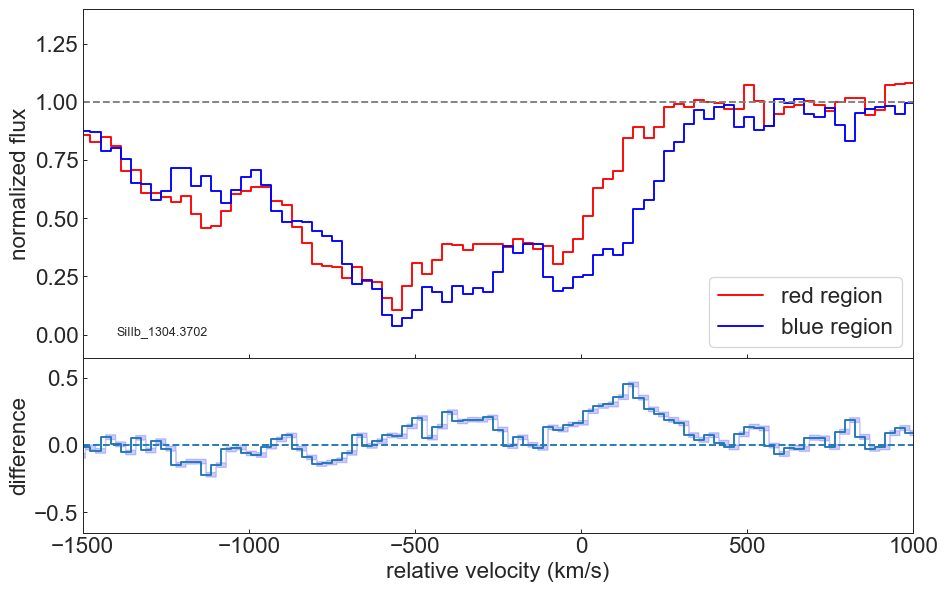

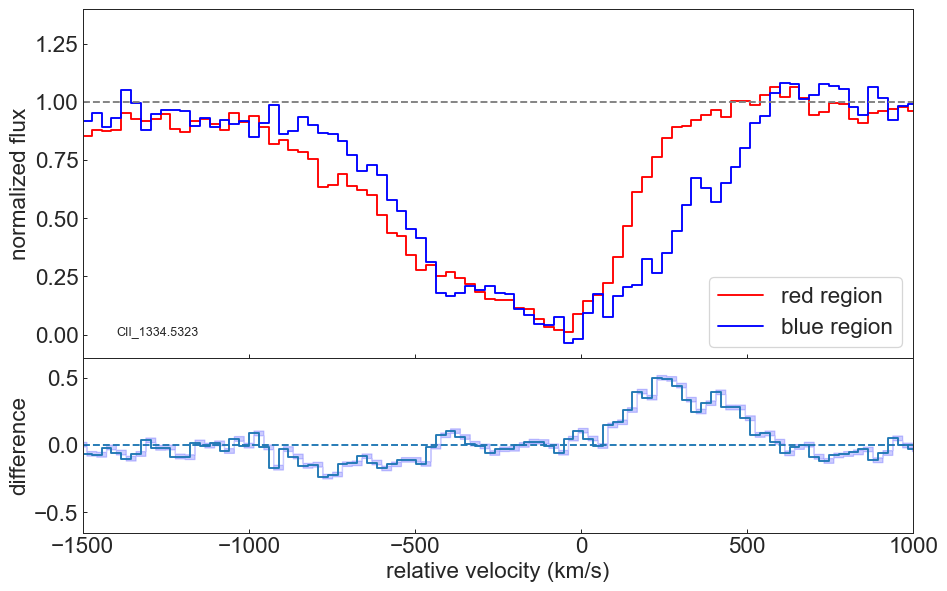

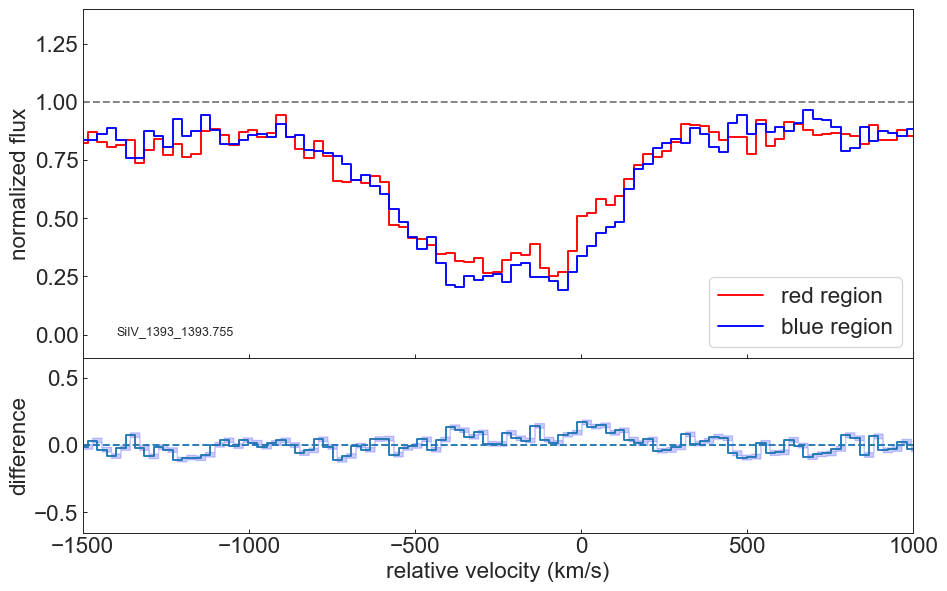

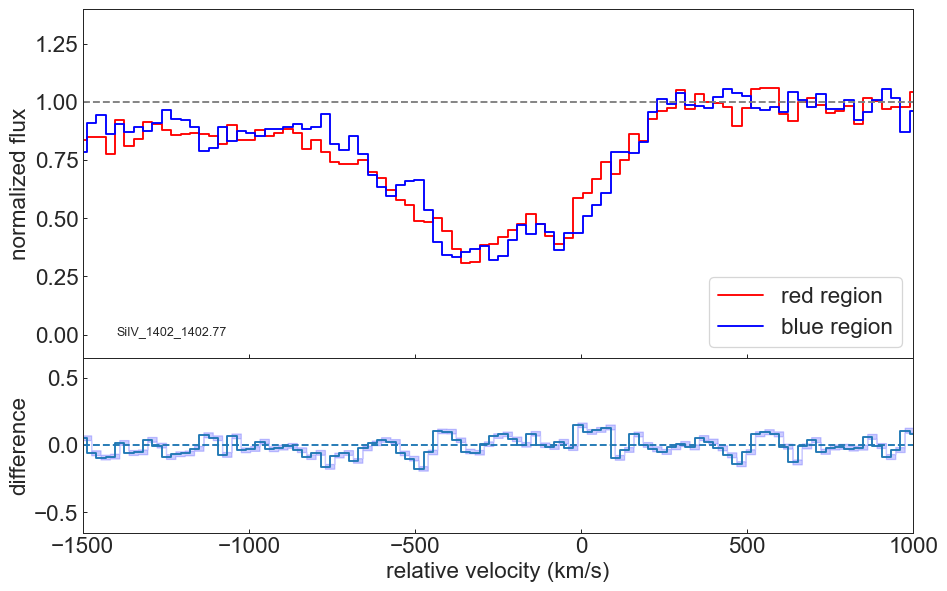

In [39]:

for j in abslines.items(): # for the absorption lines lambda > Lya
    vel_prof(rnorm,bnorm,j)

# use bluelines1.items() or bluelines.items() for lambda < Lya

#### 2.2| Average profile (both regions)

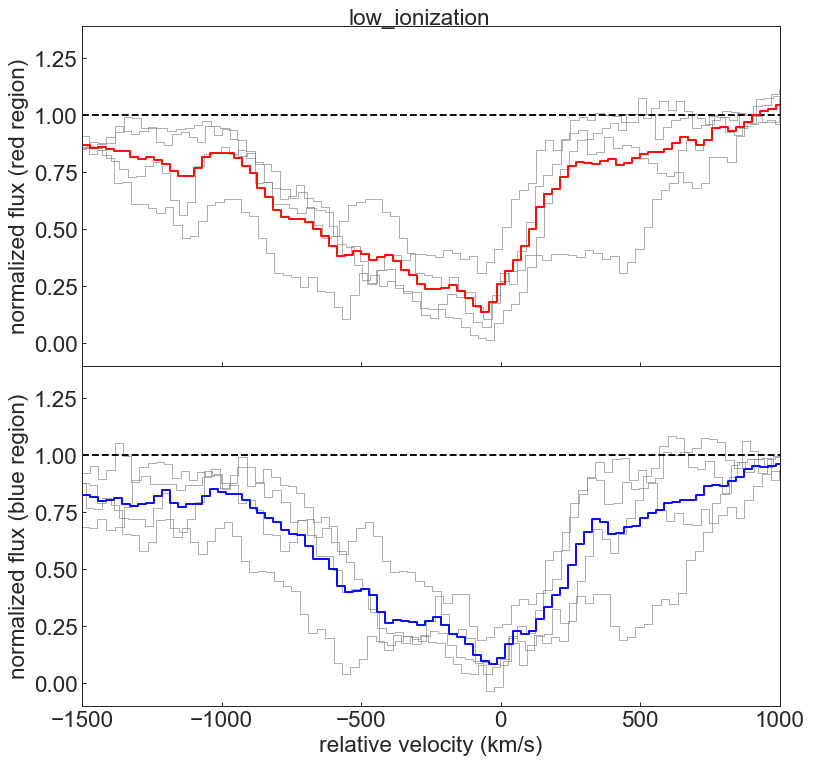

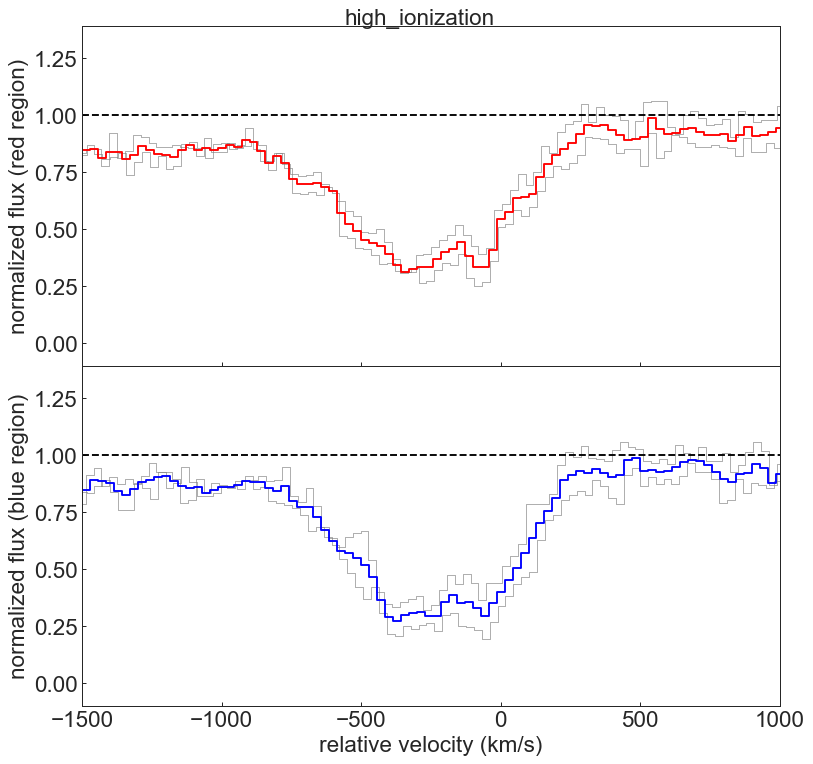

In [40]:
# plotting the AVERAGE profile for the absorption lines
avg_velpro(low_ion,(rnorm,bnorm))
avg_velpro(high_ion,(rnorm,bnorm))

##### The profiles extend upto ~1000 km/s blueward of zero velocity which implies cool gas outflows up to 1000 km/s. 

### 3| Equivalent Width

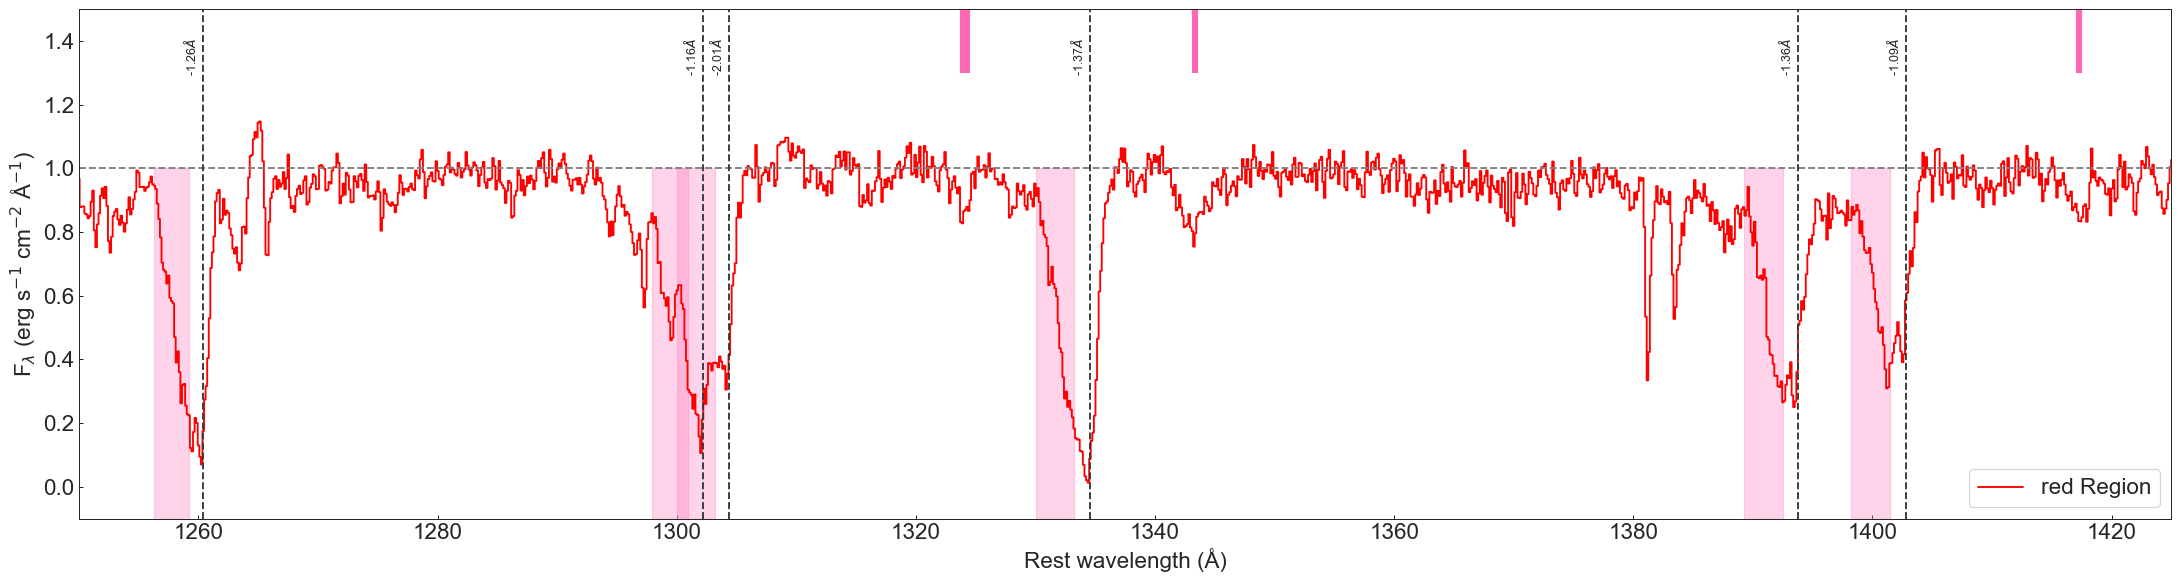

-----------------------------------------------------
EW for ('SiIIa', 1260.4221) is 1.248 +/- 0.032 Angstrom2
EW for ('OI', 1302.1685) is 1.162 +/- 0.034 Angstrom2
EW for ('SiIIb', 1304.3702) is 2.022 +/- 0.036 Angstrom2
EW for ('CII', 1334.5323) is 1.338 +/- 0.037 Angstrom2
EW for ('SiIV_1393', 1393.755) is 1.278 +/- 0.034 Angstrom2
EW for ('SiIV_1402', 1402.77) is 1.103 +/- 0.037 Angstrom2
EW for ('NI_1200.2', 1200.2233) is 1.103 +/- 0.035 Angstrom2
EW for ('NI_1134_9', 1134.9803) is 1.071 +/- 0.029 Angstrom2
EW for ('FeII_1142', 1142.3656) is 0.555 +/- 0.032 Angstrom2
EW for ('FeII_1143', 1143.226) is 0.536 +/- 0.029 Angstrom2
EW for ('FeII_1144', 1144.9379) is 0.942 +/- 0.029 Angstrom2
-----------------------------------------------------


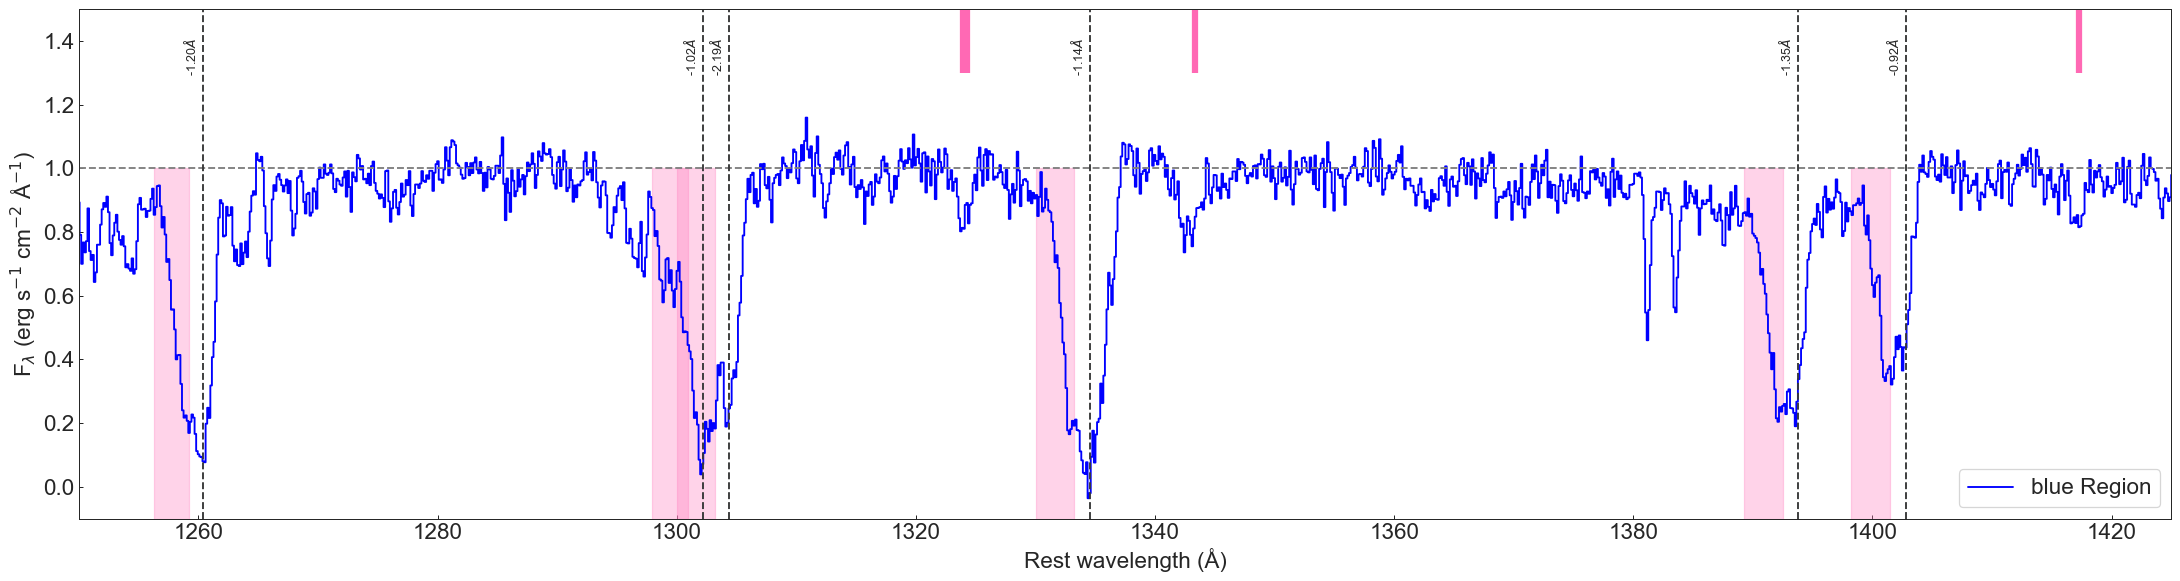

-----------------------------------------------------
EW for ('SiIIa', 1260.4221) is 1.177 +/- 0.041 Angstrom2
EW for ('OI', 1302.1685) is 1.034 +/- 0.044 Angstrom2
EW for ('SiIIb', 1304.3702) is 2.156 +/- 0.046 Angstrom2
EW for ('CII', 1334.5323) is 1.090 +/- 0.041 Angstrom2
EW for ('SiIV_1393', 1393.755) is 1.305 +/- 0.045 Angstrom2
EW for ('SiIV_1402', 1402.77) is 0.988 +/- 0.047 Angstrom2
EW for ('NI_1200.2', 1200.2233) is 1.353 +/- 0.040 Angstrom2
EW for ('NI_1134_9', 1134.9803) is 1.174 +/- 0.037 Angstrom2
EW for ('FeII_1142', 1142.3656) is 0.604 +/- 0.040 Angstrom2
EW for ('FeII_1143', 1143.226) is 0.605 +/- 0.037 Angstrom2
EW for ('FeII_1144', 1144.9379) is 1.083 +/- 0.037 Angstrom2
-----------------------------------------------------


In [41]:
combo = {**abslines, **bluelines1}
# EquivalentWidth(nwavelength, rnorm, bluelines1, -1000, -260).plot('red', xlim=(1130,1160))
# EquivalentWidth(nwavelength, bnorm, abslines, -1000, 500).plot('blue')
EquivalentWidth(nwavelength, rnorm, combo, -1000, -260).calculate_and_plot(save=True, color='red', file_path = 'ew_red.txt')
EquivalentWidth(nwavelength, bnorm, combo, -1000, -260).calculate_and_plot(save=True, color='blue', file_path = 'ew_blue.txt')

#### 3.1| Equivalent Width (Wind)

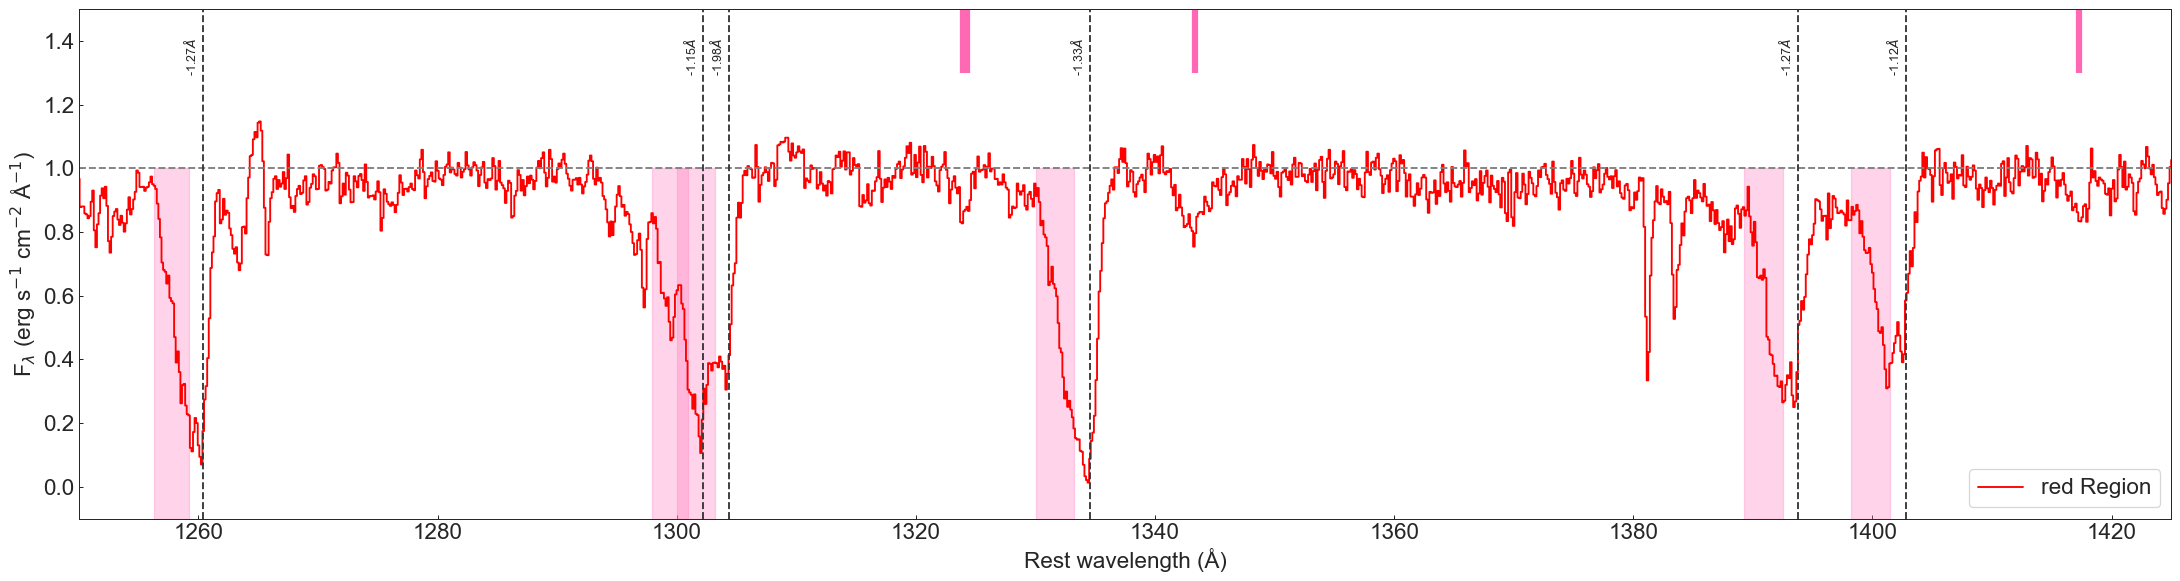

-----------------------------------------------------
EW for ('SiIIa', 1260.4221) is 1.246 +/- 0.032 Angstrom2
EW for ('OI', 1302.1685) is 1.161 +/- 0.033 Angstrom2
EW for ('SiIIb', 1304.3702) is 2.021 +/- 0.035 Angstrom2
EW for ('CII', 1334.5323) is 1.340 +/- 0.035 Angstrom2
EW for ('SiIV_1393', 1393.755) is 1.277 +/- 0.037 Angstrom2
EW for ('SiIV_1402', 1402.77) is 1.104 +/- 0.037 Angstrom2
EW for ('NI_1200.2', 1200.2233) is 1.101 +/- 0.032 Angstrom2
EW for ('NI_1134_9', 1134.9803) is 1.074 +/- 0.030 Angstrom2
EW for ('FeII_1142', 1142.3656) is 0.556 +/- 0.030 Angstrom2
EW for ('FeII_1143', 1143.226) is 0.536 +/- 0.028 Angstrom2
EW for ('FeII_1144', 1144.9379) is 0.941 +/- 0.028 Angstrom2
-----------------------------------------------------


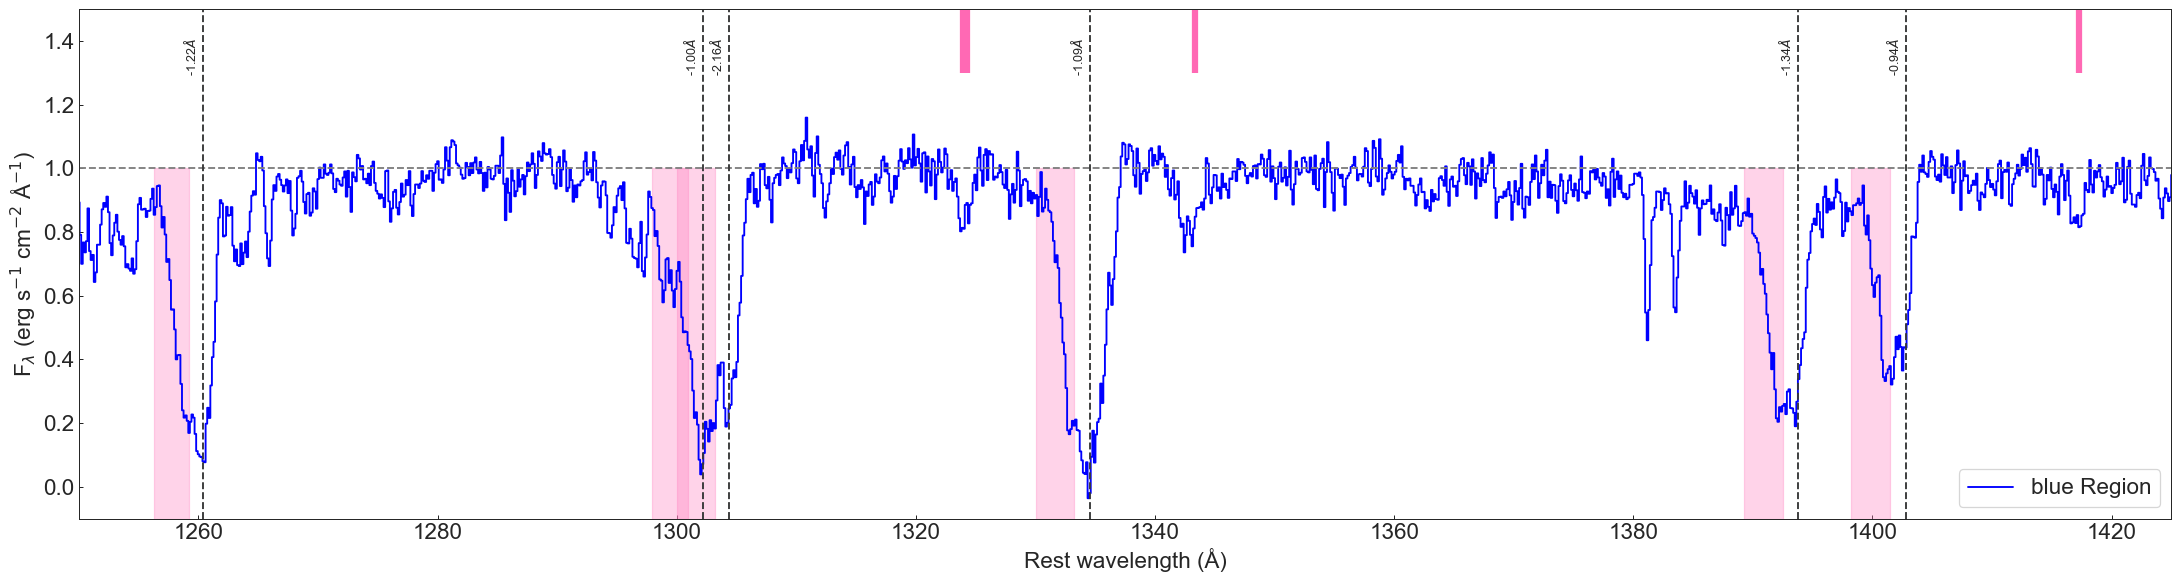

-----------------------------------------------------
EW for ('SiIIa', 1260.4221) is 1.178 +/- 0.041 Angstrom2
EW for ('OI', 1302.1685) is 1.040 +/- 0.039 Angstrom2
EW for ('SiIIb', 1304.3702) is 2.156 +/- 0.046 Angstrom2
EW for ('CII', 1334.5323) is 1.091 +/- 0.048 Angstrom2
EW for ('SiIV_1393', 1393.755) is 1.306 +/- 0.044 Angstrom2
EW for ('SiIV_1402', 1402.77) is 0.993 +/- 0.047 Angstrom2
EW for ('NI_1200.2', 1200.2233) is 1.349 +/- 0.043 Angstrom2
EW for ('NI_1134_9', 1134.9803) is 1.172 +/- 0.037 Angstrom2
EW for ('FeII_1142', 1142.3656) is 0.605 +/- 0.039 Angstrom2
EW for ('FeII_1143', 1143.226) is 0.608 +/- 0.038 Angstrom2
EW for ('FeII_1144', 1144.9379) is 1.081 +/- 0.036 Angstrom2
-----------------------------------------------------


In [42]:
EquivalentWidth(nwavelength, rnorm, combo, -1000, -260).calculate_and_plot(save=True, color='red', file_path = 'ew_red.txt')
EquivalentWidth(nwavelength, bnorm, combo, -1000, -260).calculate_and_plot(save=True, color='blue', file_path = 'ew_blue.txt')

In [43]:
file_path_red = "ew_red.txt"
file_path_blue = "ew_blue.txt"

def read_file(file_path):
    data = []
    with open(file_path, 'r') as file:
        headers = file.readline()  # Skipping the header row
        for line in file:
            data.append(line.strip().split("\t\t"))
    return data

# Using the read_file function to read data
data_red = read_file(file_path_red)
data_blue = read_file(file_path_blue)

# Extracting values from red data
lines_red = [row[0] for row in data_red]
wavelengths_red = [float(row[1]) for row in data_red]
ew_red = [float(row[2]) for row in data_red]
ew_red_error = [float(row[3]) for row in data_red]

# Extracting values from blue data
lines_blue = [row[0] for row in data_blue]
wavelengths_blue = [float(row[1]) for row in data_blue]
ew_blue = [float(row[2]) for row in data_blue]
ew_blue_error = [float(row[3]) for row in data_blue]

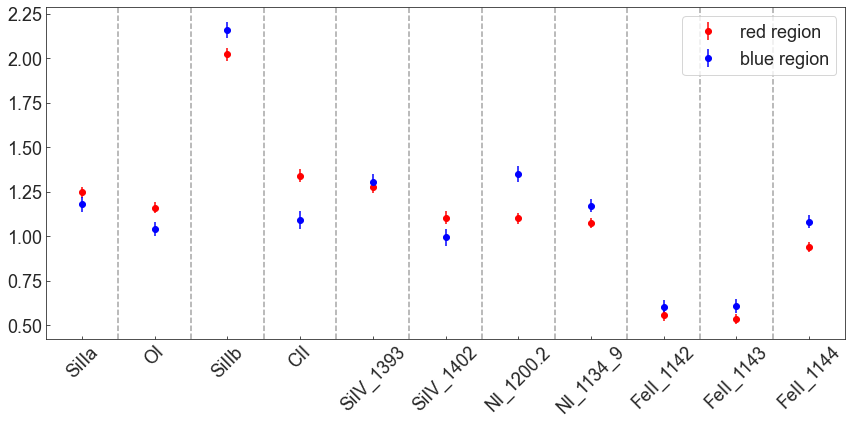

In [44]:
plt.figure(figsize=(12, 6))

plt.errorbar(lines_red, ew_red, yerr=ew_red_error, fmt='o', color='red', label='red region')
plt.errorbar(lines_blue, ew_blue, yerr=ew_blue_error, fmt='o', color='blue', label='blue region')

# Vertical lines separating each line
for i in range(1, len(lines_red)):
    plt.axvline(i - 0.5, color='grey', linestyle='--', alpha=0.7)

plt.xticks(np.arange(len(lines_red)), lines_red, rotation=45)  
plt.legend()
plt.tight_layout()


### 4| Optical depth analysis


#### 4.1| Plot : Optical depth vs wavelength

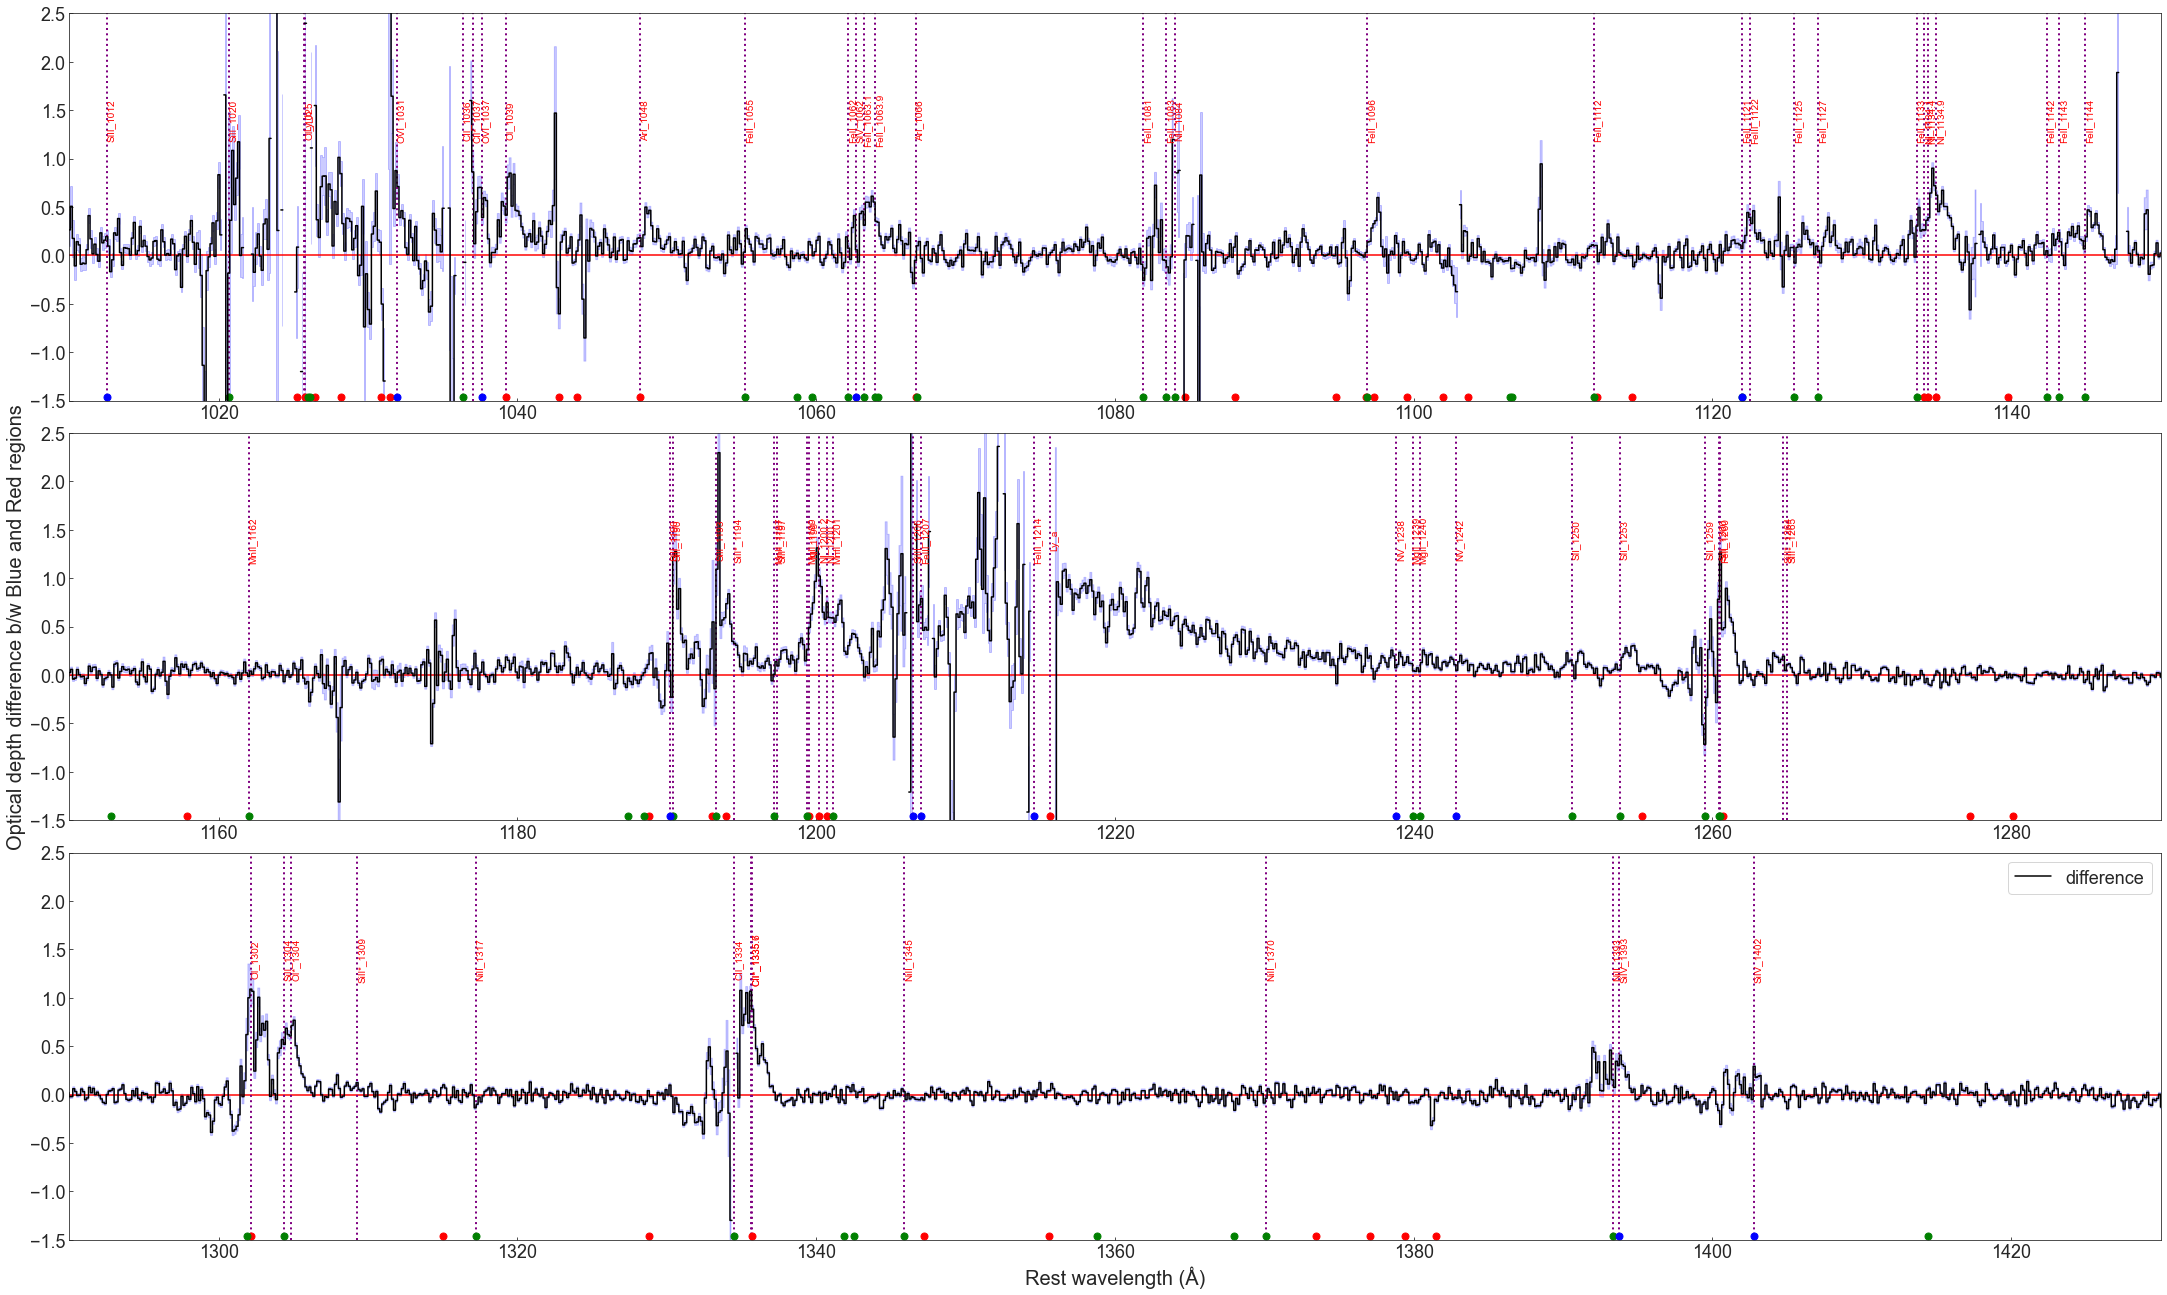

In [45]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
od_r = np.log(1/rnorm.value)
od_b = np.log(1/bnorm.value)
od_r_err = rnorm_err.value/rnorm.value
od_b_err = bnorm_err.value/bnorm.value
od_diff_err = np.sqrt(od_r_err**2 + od_b_err**2)

fig, ax = plt.subplots(3,1,figsize=(30, 18),
                #  dpi=900
                )
for i in range(3):
    ax[i].plot(nwavelength, od_b-od_r, drawstyle="steps-mid", color = 'black', zorder=3, label = 'difference')
    ax[i].fill_between(nwavelength, od_b-od_r-od_diff_err, od_b-od_r+od_diff_err, step='mid', color=ap1color, alpha =0.2)
    ax[i].axhline(y=0, color='red', ls = '-')
    for line in newlines.items():
        ax[i].axvline(line[1], linestyle=":", color="purple", lw=2)
        ax[i].text(line[1],1.4, line[0],color="red",rotation=90, verticalalignment='center',clip_on=True)
    for line in rlines.items():
        ax[i].plot(line[1], -1.46, 'ro', markersize = 7)
    for line in glines.items():
        ax[i].plot(line[1], -1.46, 'go', markersize = 7)
    for line in tlines.items():
        ax[i].plot(line[1], -1.46, 'bo', markersize = 7)

    
ax[0].axis([1010,1150,-1.5,2.5])
ax[1].axis([1150,1290,-1.5,2.5])
ax[2].axis([1290,1430,-1.5,2.5])


# plot_lines(ax1,ax2,ax3,1.4,'y')
plt.xlabel("Rest wavelength (Å)", fontsize=20)
ax[1].set_ylabel("Optical depth difference b/w Blue and Red regions", fontsize=20)
plt.tight_layout()
plt.legend()
# plt.savefig('diff_line_optdepth.png')
plt.show()

#### 4.2| Column density vs relative velocity


##### 4.2.1| Plot : SiIIa_1260 , CII_1334 , SiIV_1393 , SiIV_1402

Log Column Density for ('SiIIa', 1260.4221) (red): 14.497 \pm 0.019
Log Column Density for ('SiIIa', 1260.4221) (blue): 14.560 \pm 0.023
Log Column Density for ('OI', 1302.1685) (red): 15.883 \pm 0.015
Log Column Density for ('OI', 1302.1685) (blue): 15.953 \pm 0.024
Log Column Density for ('SiIIb', 1304.3702) (red): 15.596 \pm 0.016
Log Column Density for ('SiIIb', 1304.3702) (blue): 15.737 \pm 0.022
Log Column Density for ('CII', 1334.5323) (red): 15.535 \pm 0.023
Log Column Density for ('CII', 1334.5323) (blue): 15.576 \pm 0.009
Log Column Density for ('SiIV_1393', 1393.755) (red): 14.666 \pm 0.016
Log Column Density for ('SiIV_1393', 1393.755) (blue): 14.731 \pm 0.020
Log Column Density for ('SiIV_1402', 1402.77) (red): 14.829 \pm 0.018
Log Column Density for ('SiIV_1402', 1402.77) (blue): 14.834 \pm 0.023


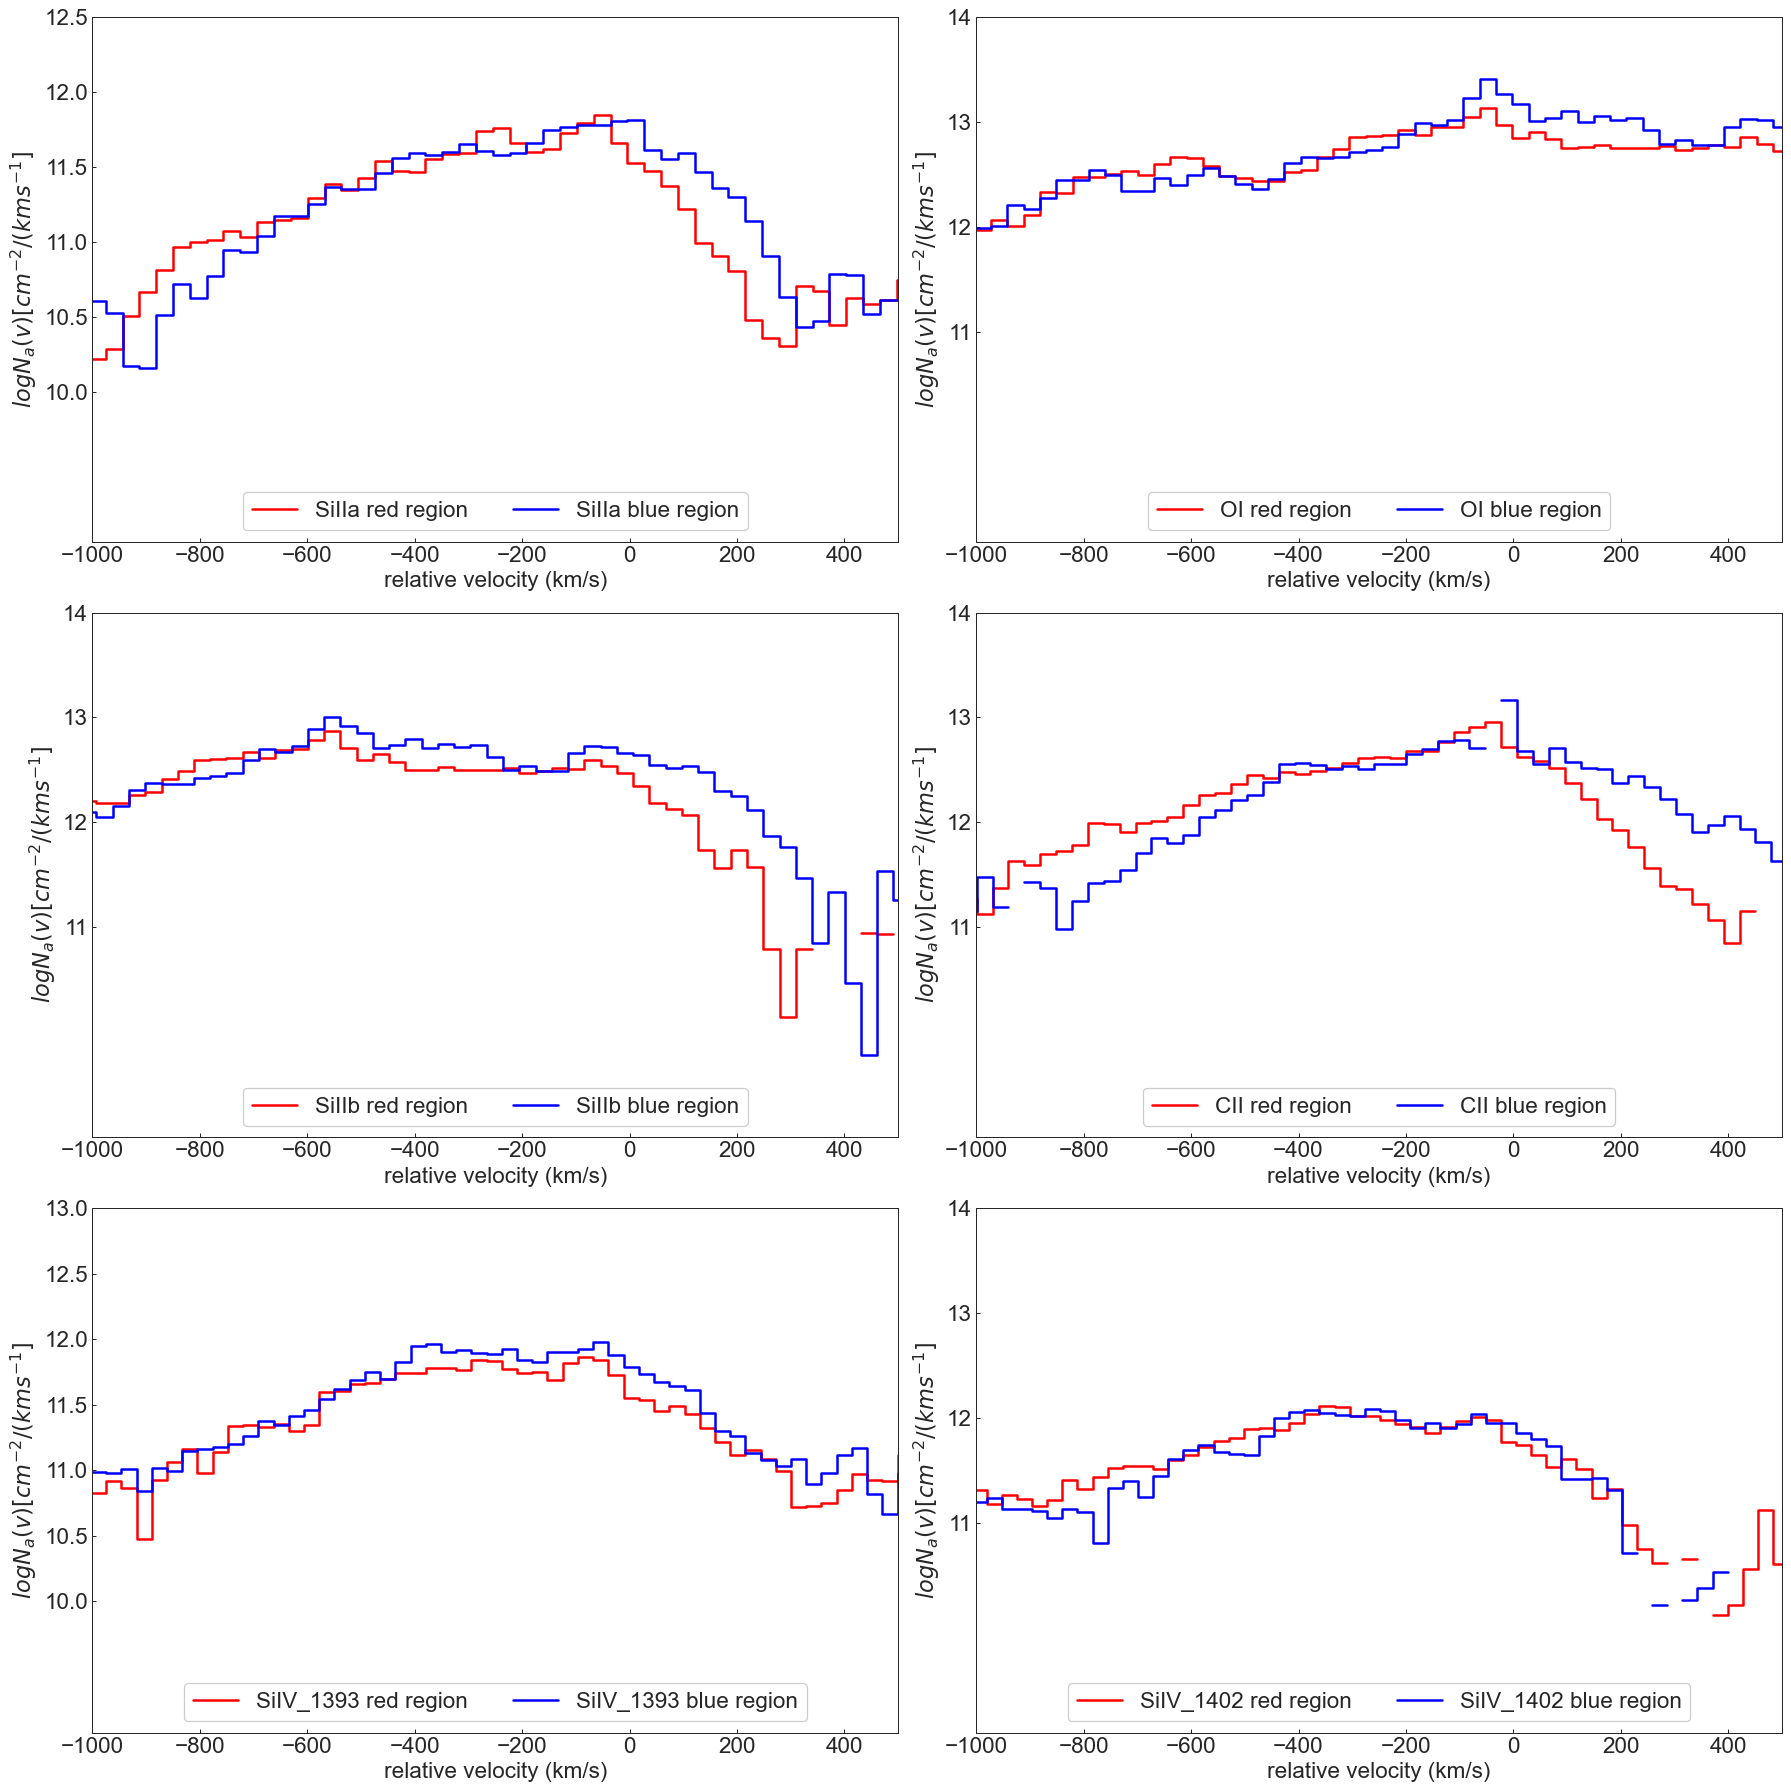

In [323]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

# syntax : cold_prof2 ( absorption line | f-value | data | region(blue/red) | color )

fig = plt.figure(num=3,figsize=(20, 20),dpi=90)
ax1 = plt.subplot(321)
ColumnDensity(("SiIIa", 1260.4221),1.180,rnorm,500).result(ax1, 'red', color = True)
ColumnDensity(("SiIIa", 1260.4221),1.180,bnorm,500).result(ax1, 'blue', color = True)
ax2 = plt.subplot(322)
ColumnDensity(("OI", 1302.1685),4.8870E-02,rnorm,500).result(ax2, 'red', color = True)
ColumnDensity(("OI", 1302.1685),4.8870E-02,bnorm,500).result(ax2, 'blue', color = True)
ax3 = plt.subplot(323)
ColumnDensity(("SiIIb", 1304.3702),8.6E-02,rnorm,500).result(ax3, 'red', color = True)
ColumnDensity(("SiIIb", 1304.3702),8.6E-02,bnorm,500).result(ax3, 'blue', color = True)
ax4 = plt.subplot(324)
ColumnDensity(("CII", 1334.5323),1.28E-01,rnorm,500).result(ax4, 'red', color = True)
ColumnDensity(("CII", 1334.5323),1.28E-01,bnorm,500).result(ax4, 'blue', color = True)
ax5 = plt.subplot(325)
ColumnDensity(("SiIV_1393", 1393.7550),5.13E-01,rnorm,500).result(ax5, 'red', color = True)
ColumnDensity(("SiIV_1393", 1393.7550),5.13E-01,bnorm,500).result(ax5, 'blue', color = True)
ax6 = plt.subplot(326)
ColumnDensity(("SiIV_1402", 1402.77),2.54E-01,rnorm,500).result(ax6, 'red', color = True)
ColumnDensity(("SiIV_1402", 1402.77),2.54E-01,bnorm,500).result(ax6, 'blue', color = True)

plt.tight_layout()
#f-values from Donald C. Morton 10.1086/377639

##### 4.2.2| Plot : NI_1200.2 , NI_1134_9 , FeII_1142 , FeII_1143 , FeII_1144

Log Column Density for ('NI_1200.2', 1200.2233) (red): 15.465 +/- 0.015
Log Column Density for ('NI_1200.2', 1200.2233) (blue): 15.697 +/- 0.018
Log Column Density for ('NI_1134_9', 1134.9803) (red): 15.648 +/- 0.018
Log Column Density for ('NI_1134_9', 1134.9803) (blue): 15.863 +/- 0.020
Log Column Density for ('FeII_1142', 1142.3656) (red): 16.626 +/- 0.019
Log Column Density for ('FeII_1142', 1142.3656) (blue): 16.699 +/- 0.023
Log Column Density for ('FeII_1143', 1143.226) (red): 15.988 +/- 0.019
Log Column Density for ('FeII_1143', 1143.226) (blue): 16.076 +/- 0.020
Log Column Density for ('FeII_1144', 1144.9379) (red): 15.369 +/- 0.019
Log Column Density for ('FeII_1144', 1144.9379) (blue): 15.507 +/- 0.020


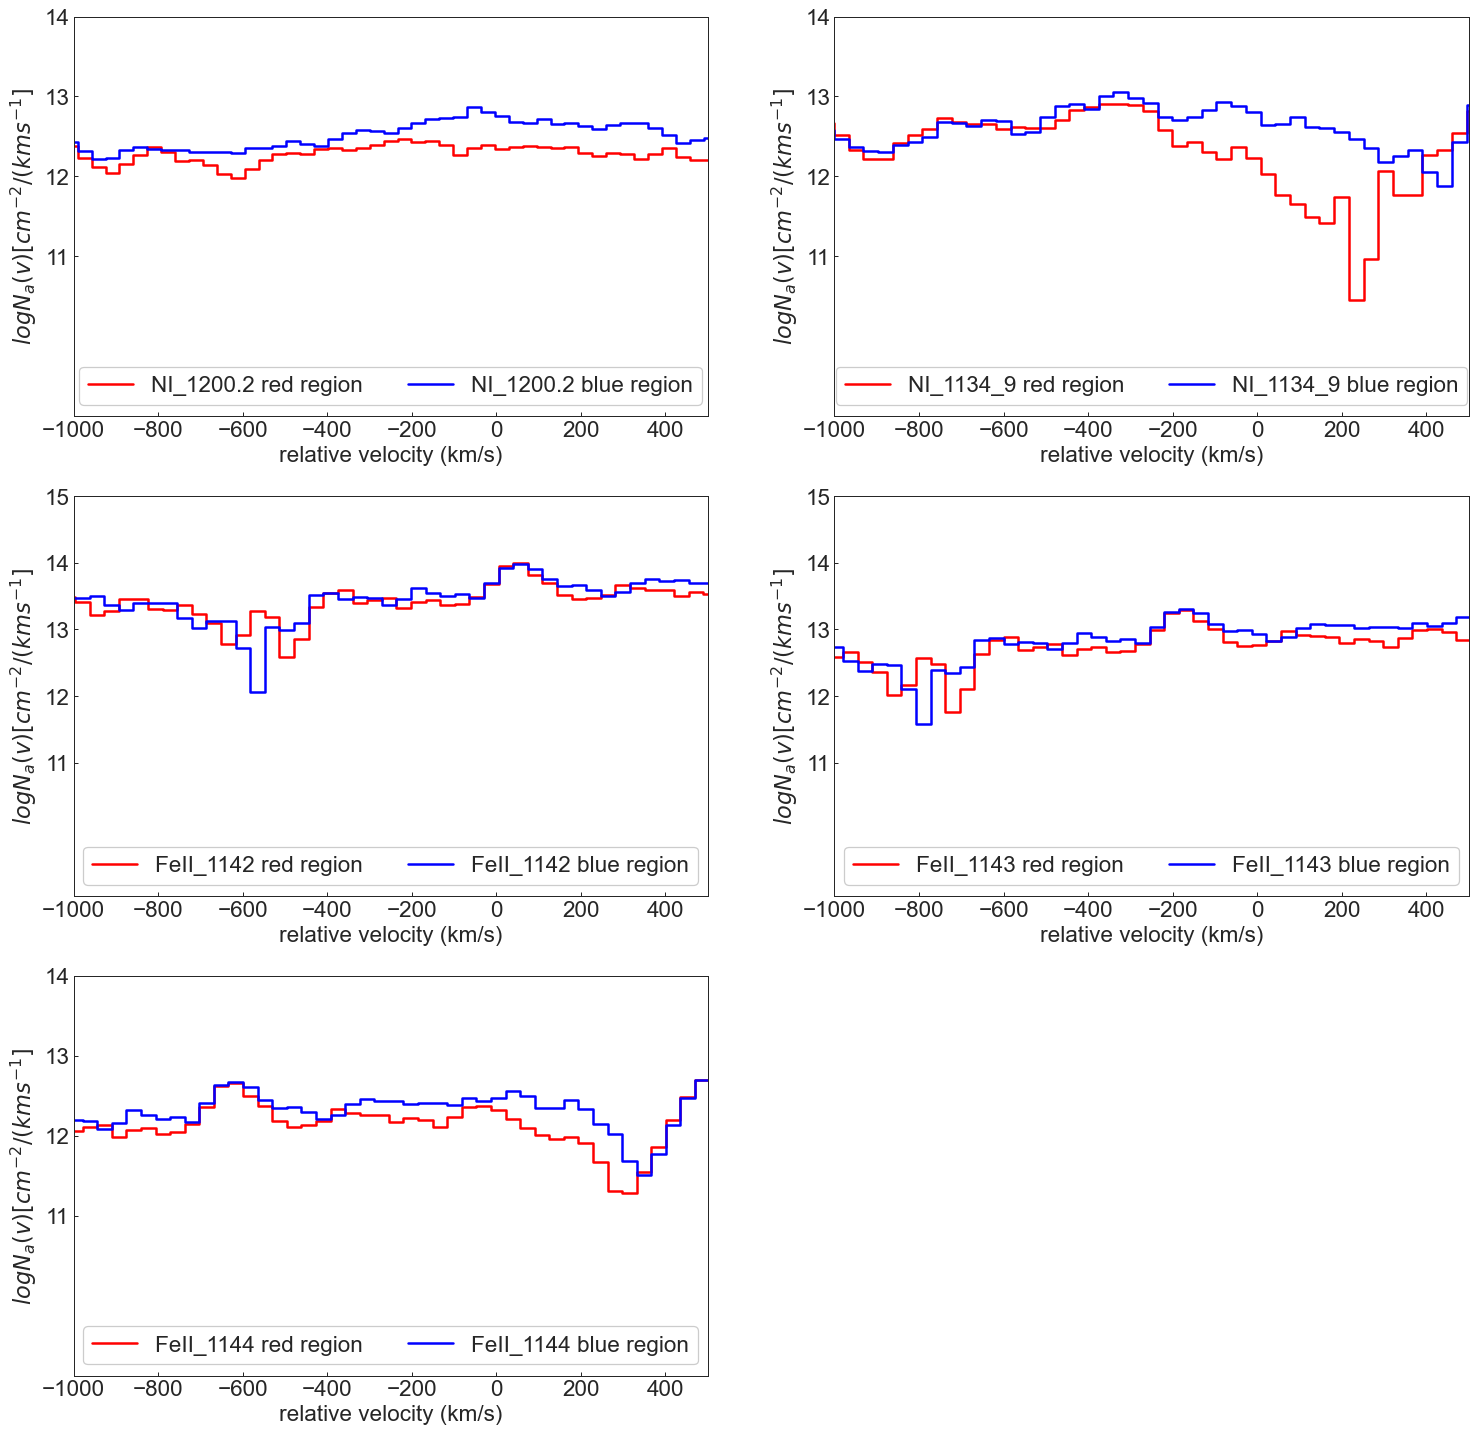

In [313]:
fig = plt.figure(num=4,figsize=(20, 20),dpi=90)

ax1 = plt.subplot(321)
ColumnDensity(('NI_1200.2', 1200.2233),8.69E-02,rnorm,500).result(ax1, 'red', color = True)
ColumnDensity(('NI_1200.2', 1200.2233),8.69E-02,bnorm,500).result(ax1, 'blue', color = True)
ax2 = plt.subplot(322)
ColumnDensity(('NI_1134_9', 1134.9803),4.16E-02,rnorm,500).result(ax2, 'red', color = True)
ColumnDensity(('NI_1134_9', 1134.9803),4.16E-02,bnorm,500).result(ax2, 'blue', color = True)
ax3 = plt.subplot(323)
ColumnDensity(('FeII_1142', 1142.3656),4.01E-03,rnorm,500).result(ax3, 'red', color = True)
ColumnDensity(('FeII_1142', 1142.3656),4.01E-03,bnorm,500).result(ax3, 'blue', color = True)
ax4 = plt.subplot(324)
ColumnDensity(('FeII_1143', 1143.226),1.92E-02,rnorm,500).result(ax4, 'red', color = True)
ColumnDensity(('FeII_1143', 1143.226),1.92E-02,bnorm,500).result(ax4, 'blue', color = True)
ax5 = plt.subplot(325)
ColumnDensity(('FeII_1144', 1144.9379),8.30E-02,rnorm,500).result(ax5, 'red', color = True)
ColumnDensity(('FeII_1144', 1144.9379),8.30E-02,bnorm,500).result(ax5, 'blue', color = True)



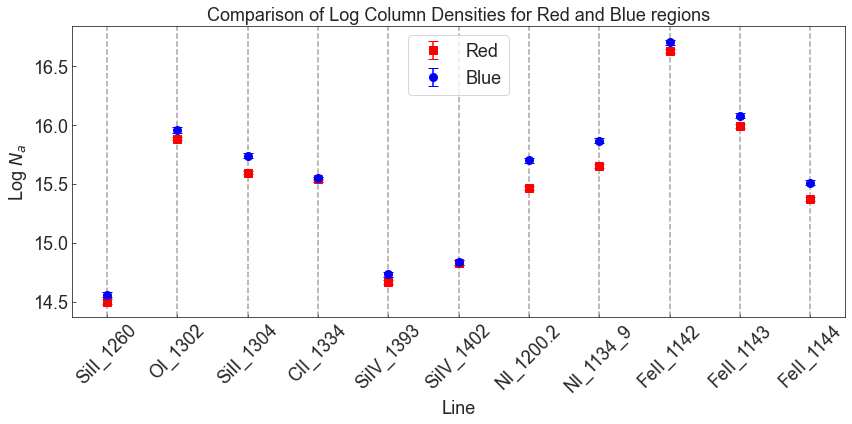

In [331]:

# Data
lines_new = ['SiII_1260', 'OI_1302', 'SiII_1304', 'CII_1334', 'SiIV_1393', 'SiIV_1402']
wavelengths_new = [1260.4221, 1302.1685, 1304.3702, 1334.5323, 1393.755, 1402.77]
log_column_density_red = [14.500, 15.882, 15.594, 15.536, 14.665, 14.830]
log_column_density_red_error = [0.019, 0.015, 0.015, 0.023, 0.015, 0.019]
log_column_density_blue = [14.559, 15.953, 15.737, 15.548, 14.732, 14.833]
log_column_density_blue_error = [0.022, 0.024, 0.023, 0.006, 0.021, 0.022]

index_new = np.arange(len(lines_new))

# Adding the new data

# New lines and their values
lines_additional = ['NI_1200.2', 'NI_1134_9', 'FeII_1142', 'FeII_1143', 'FeII_1144']
wavelengths_additional = [1200.2233, 1134.9803, 1142.3656, 1143.226, 1144.9379]
log_column_density_red_additional = [15.465, 15.648, 16.626, 15.988, 15.369]
log_column_density_red_error_additional = [0.015, 0.018, 0.019, 0.019, 0.019]
log_column_density_blue_additional = [15.697, 15.863, 16.699, 16.076, 15.507]
log_column_density_blue_error_additional = [0.018, 0.020, 0.023, 0.020, 0.020]

# Merging old and new data
lines_combined = lines_new + lines_additional
wavelengths_combined = wavelengths_new + wavelengths_additional
log_column_density_red_combined = log_column_density_red + log_column_density_red_additional
log_column_density_red_error_combined = log_column_density_red_error + log_column_density_red_error_additional
log_column_density_blue_combined = log_column_density_blue + log_column_density_blue_additional
log_column_density_blue_error_combined = log_column_density_blue_error + log_column_density_blue_error_additional

index_combined = np.arange(len(lines_combined))

# Plotting combined data
plt.figure(figsize=(12, 6))

# Red measurements with error bars
plt.errorbar(index_combined, log_column_density_red_combined, yerr=log_column_density_red_error_combined, 
             fmt='s', label='Red', markersize=8, capsize=5, color='r')

# Blue measurements with error bars
plt.errorbar(index_combined, log_column_density_blue_combined, yerr=log_column_density_blue_error_combined, 
             fmt='o', label='Blue', markersize=8, capsize=5, color='b')

# Vertical lines
for i in range(0, len(lines_combined)):
    plt.axvline(i, color='grey', linestyle='--', alpha=0.7)

# Labels and title
plt.xlabel('Line')
plt.ylabel('Log $N_a$')
plt.title('Comparison of Log Column Densities for Red and Blue regions')
plt.xticks(index_combined, lines_combined, rotation=45)  
plt.legend()
plt.tight_layout()
plt.savefig('log_column_density_compare.png')

plt.show()



##### 4.2.3| Column Density (wind limit)

Log Column Density for ('SiIV_1393', 1393.755) (red): 14.301 +/- 0.016
Log Column Density for ('SiIV_1393', 1393.755) (blue): 14.336 +/- 0.020
Log Column Density for ('SiIV_1402', 1402.77) (red): 14.551 +/- 0.017
Log Column Density for ('SiIV_1402', 1402.77) (blue): 14.508 +/- 0.023
Log Column Density for ('SiIV_1393', 1393.755) (red): 14.667 +/- 0.016
Log Column Density for ('SiIV_1393', 1393.755) (blue): 14.732 +/- 0.020
Log Column Density for ('SiIV_1402', 1402.77) (red): 14.830 +/- 0.019
Log Column Density for ('SiIV_1402', 1402.77) (blue): 14.833 +/- 0.023


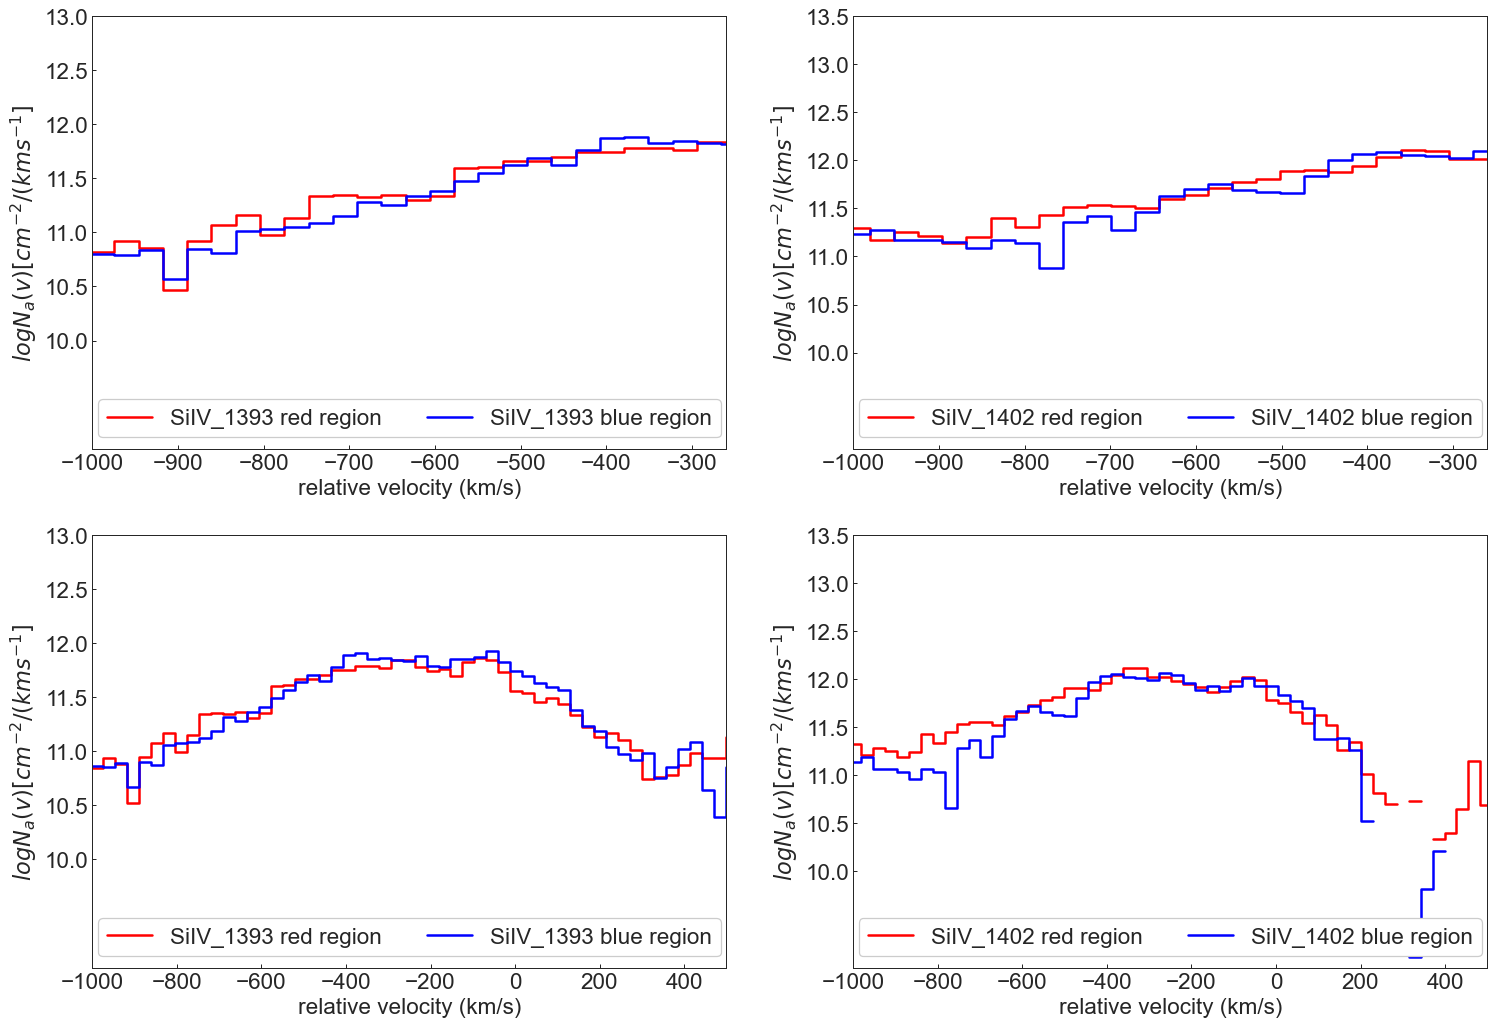

In [314]:
fig = plt.figure(num=5,figsize=(20,14),dpi=90)

ax1 = plt.subplot(221)
ColumnDensity(('SiIV_1393', 1393.7550),5.13E-01,rnorm,-260).result(ax1, 'red', color = True)
ColumnDensity(('SiIV_1393', 1393.7550),5.13E-01,bnorm,-260).result(ax1, 'blue', color = True)
ax2 = plt.subplot(222)
ColumnDensity(('SiIV_1402', 1402.77),2.54E-01,rnorm,-260).result(ax2, 'red', color = True)
ColumnDensity(('SiIV_1402', 1402.77),2.54E-01,bnorm,-260).result(ax2, 'blue', color = True)
ax3 = plt.subplot(223)
ColumnDensity(('SiIV_1393', 1393.7550),5.13E-01,rnorm,500).result(ax3, 'red', color = True)
ColumnDensity(('SiIV_1393', 1393.7550),5.13E-01,bnorm,500).result(ax3, 'blue', color = True)
ax4 = plt.subplot(224)
ColumnDensity(('SiIV_1402', 1402.77),2.54E-01,rnorm,500).result(ax4, 'red', color = True)
ColumnDensity(('SiIV_1402', 1402.77),2.54E-01,bnorm,500).result(ax4, 'blue', color = True)



#### 4.2.4| Optical depth (wind) $\tau_{wind}$

In [218]:
import scipy.stats as stats
# define a normal distribution centered at -260 km/s

def tau_wind(N_tot,absline,f,sigma):
    absline *= u.AA
    N_tot = N_tot / u.cm / u.cm

    # x = np.linspace(-260 - 3*sigma, -260 + 3*sigma, 10000)
    x = np.linspace(-1000,500,10000)
    N = stats.norm.pdf(x, -260, sigma)
    N_v = N_tot * N / u.km * u.s
    return 2.65e-15 * absline * f * N_v, x



#### 4.3| Optical depth comparison

In [219]:
# LOW ionization optical depth comparison
# ------------------------------------------------------------------
xvals = np.linspace(-1500,1500,106) * u.km/u.s

'''
we don't want to lose any data, and 106 points is around the upper limit 
in the (-1500,1500) range so it is easier to map data for all ionization 
lines to the same x-axis.
'''
low_od_r = np.array([abslines_od(('SiIIa', 1260.4221),rnorm),
                        abslines_od(("CII", 1334.5323),rnorm),
                        abslines_od(('OI', 1302.1685),rnorm,(400,798)),
                        abslines_od(('SiIIb', 1304.3702),rnorm,(-700,-190))])

low_od_b = np.array([abslines_od(('SiIIa', 1260.4221),bnorm),
                        abslines_od(("CII", 1334.5323),bnorm),
                        abslines_od(('OI', 1302.1685),bnorm,(400,798)),
                        abslines_od(('SiIIb', 1304.3702),bnorm,(-700,-190))])

# masking for OI and SiIIb -- repeats/closely spaced

# HIGH ionization optical depth comparison
# ------------------------------------------------------------------
high_od_r = np.nanmean((abslines_od(('SiIV_1393', 1393.75),rnorm),
                        abslines_od(('SiIV_1402', 1402.75),rnorm)),axis=0)
high_od_b = np.nanmean((abslines_od(('SiIV_1393', 1393.75),bnorm),
                        abslines_od(('SiIV_1402', 1402.75),bnorm)),axis=0)


# ------------------------------------------------------------------
# [0] for red and [1] for blue / recall col=(ap0color,ap1color)
norm_data = (rnorm,bnorm) #normalized flux
od = (od_r,od_b) #optical depth
od_err = (od_r_err,od_b_err) #optical depth error
low_od = (low_od_r,low_od_b) #low ionization optical depth
high_od = (high_od_r,high_od_b) #high ionization optical depth
# ------------------------------------------------------------------

# mask the velocities corresponding to the range
opp = np.where((velo(("SiIIb", 1304.3702)).value<-700) | (velo(("SiIIb", 1304.3702)).value>-200), velo(("SiIIb", 1304.3702)), np.nan)
opp1 = np.where((velo(("OI", 1302.1685)).value<400) | (velo(("OI", 1302.1685)).value>798), velo(("OI", 1302.1685)), np.nan)


##### 4.3.1| Low Ionization

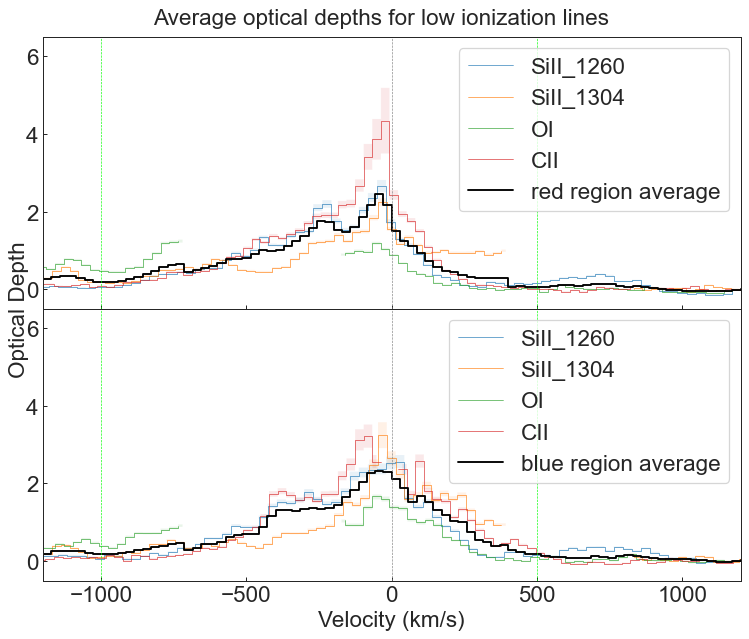

In [220]:
# Plot for LOW ionization optical depth
# ------------------------------------------------------------------

fig,ax = plt.subplots(len(norm_data),1,sharex=True,sharey=True,figsize=(10,len(norm_data)*4),dpi=90)
for i in range(len(norm_data)):

    # optical depths
    ax[i].plot(velo(("SiIIa", 1260.4221)),od[i],lw=0.5,drawstyle='steps-mid',label='SiII_1260')
    ax[i].plot(opp1,od[i],lw=0.5,drawstyle='steps-mid',label='SiII_1304')
    ax[i].plot(opp,od[i],lw=0.5,drawstyle='steps-mid',label="OI")
    ax[i].plot(velo(("CII", 1334.5323)),od[i],lw=0.5,drawstyle='steps-mid',label="CII")

    # errors
    ax[i].fill_between(velo(("SiIIa", 1260.4221)), od[i]-od_err[i], od[i]+od_err[i], step='mid', alpha =0.1)
    ax[i].fill_between(opp1, od[i]-od_err[i], od[i]+od_err[i], step='mid', alpha =0.1)
    ax[i].fill_between(opp, 
                        od[i]-od_err[i], od[i]+od_err[i], step='mid', alpha =0.1)
    ax[i].fill_between(velo(("CII", 1334.5323)), 
                        od[i]-od_err[i], od[i]+od_err[i], step='mid', alpha =0.1)

    # average profile
    ax[i].plot(xvals,np.nanmean(low_od[i],axis=0),color='k',label='%s region average'%col[i],drawstyle="steps-mid")
    
    # EW calculation limits
    ax[i].axvline(-1000,color='lime',ls='--',lw=0.5)
    ax[i].axvline(500,color='lime',ls='--',lw=0.5)


    ax[i].axvline(0,color='gray',ls='--',lw=0.5)
    ax[i].set_xlim(-1200,1200)
    ax[i].set_ylim(-0.5,6.5)
    ax[i].legend()
ax[0].get_shared_x_axes().join(ax[0], ax[1])
ax[1].set_xlabel('Velocity (km/s)')
ax[1].yaxis.set_label_coords(-0.02,1)
ax[1].set_ylabel('Optical Depth')
plt.suptitle('Average optical depths for low ionization lines',y=0.92)
plt.subplots_adjust(hspace=0)

# plt.savefig('low_ion_optd.png')
plt.show()


##### 4.3.2| High Ionization

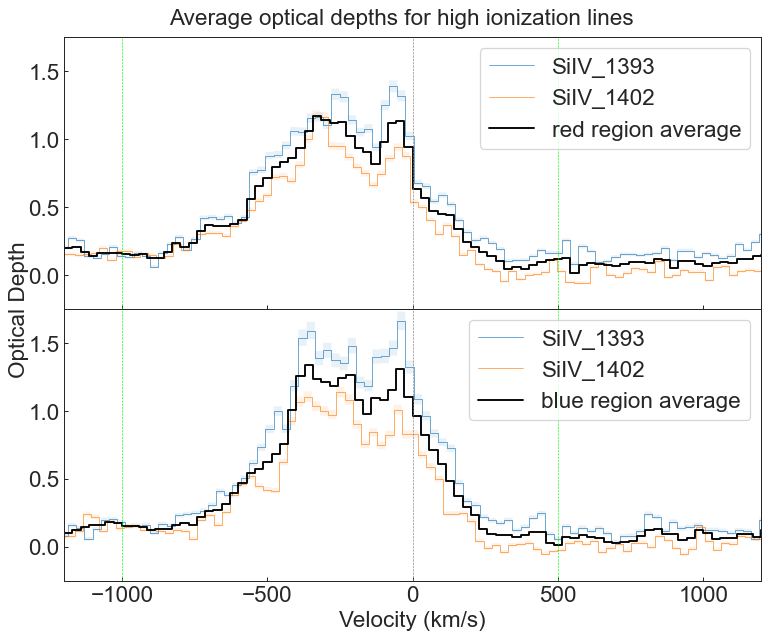

In [222]:
# Plot for HIGH ionization optical depth
# ------------------------------------------------------------------
fig,ax = plt.subplots(len(norm_data),1,sharex=True,figsize=(10,len(norm_data)*4),dpi=90)
for i in range(len(norm_data)):
    for j in high_ion.items():
        # optical depths
        ax[i].plot(velo(j),od[i],lw=0.5, drawstyle="steps-mid",label='%s'%j[0])
        # errors
        ax[i].fill_between(velo(j), od[i]-od_err[i], od[i]+od_err[i], step='mid', alpha =0.1)

    # average profile
    ax[i].plot(xvals,high_od[i],color='k',label='%s region average'%col[i],drawstyle="steps-mid")

    # EW calculation limits
    ax[i].axvline(-1000,color='lime',ls='--',lw=0.5)
    ax[i].axvline(500,color='lime',ls='--',lw=0.5)

    ax[i].axvline(0,color='gray',ls='--',lw=0.5)
    ax[i].set_xlim(-1200,1200)
    ax[i].set_ylim(-0.25,1.75)
    ax[i].legend()
ax[0].get_shared_x_axes().join(ax[0], ax[1])
ax[1].set_xlabel('Velocity (km/s)')
ax[1].yaxis.set_label_coords(-0.05,1)
ax[1].set_ylabel('Optical Depth')
plt.suptitle('Average optical depths for high ionization lines',y=0.92)
plt.subplots_adjust(hspace=0)

# plt.savefig('high_ion_optd.png')
plt.show()

#### 4.4| Difference plot of 2 regions

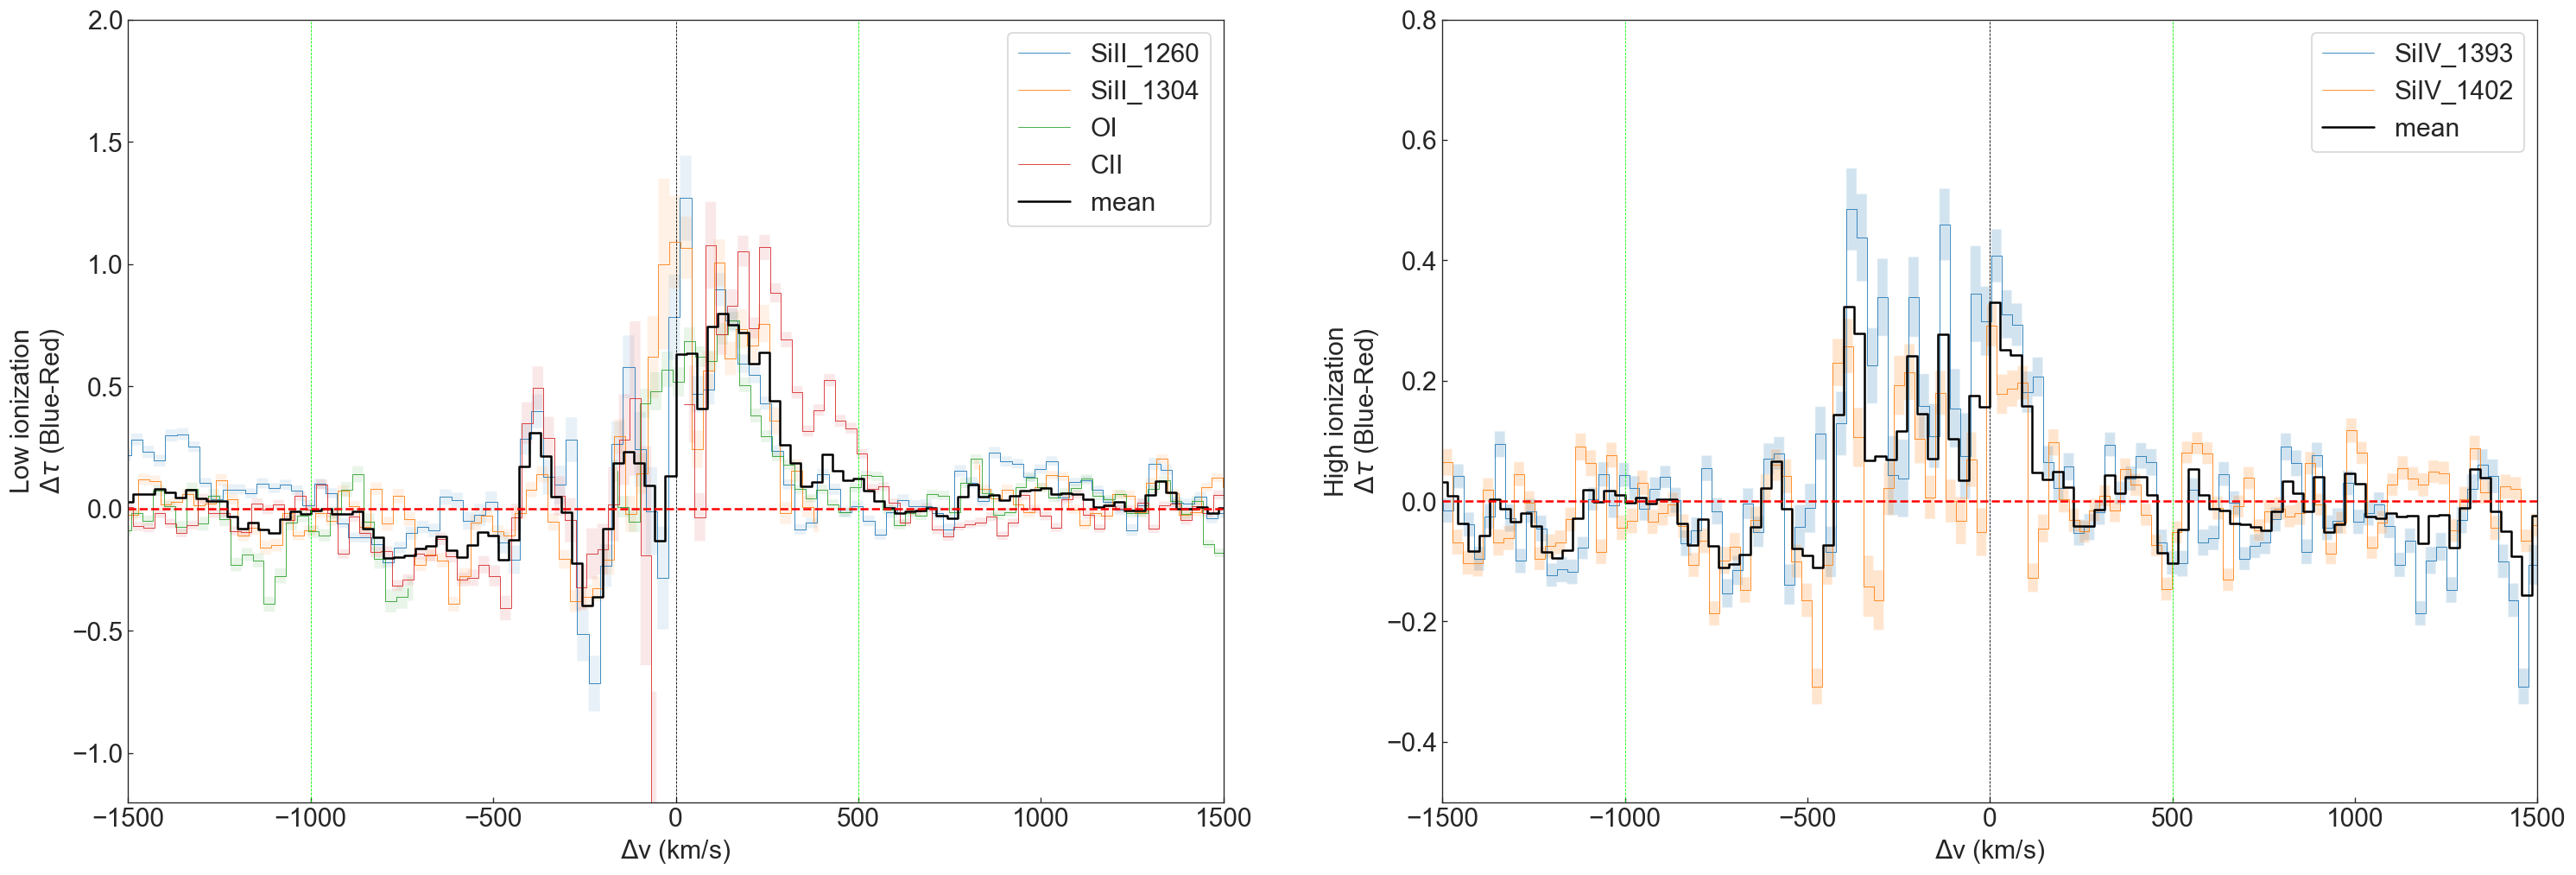

In [223]:
# difference plot for optical depths
# ------------------------------------------------------------------

# fig, ax = plt.subplots(2,1,figsize=(10,15),dpi=120) #to better view the plots
fig, ax = plt.subplots(1,2,figsize=(30,10),dpi=120)

# axis1
# --------------------------------------------------
ax[0].set_ylabel('Low ionization' '\n' r'$\Delta \tau$ (Blue-Red)',fontsize=18)

# optical depths for low_ion
ax[0].plot(velo(("SiIIa", 1260.4221)),od[1]-od[0],lw=0.5,drawstyle='steps-mid',label='SiII_1260')
ax[0].plot(opp1,od[1]-od[0],lw=0.5,drawstyle='steps-mid',label='SiII_1304')
ax[0].plot(opp,od[1]-od[0],lw=0.5,drawstyle='steps-mid',label="OI")
ax[0].plot(velo(("CII", 1334.5323)),od[1]-od[0],lw=0.5,drawstyle='steps-mid',label="CII")

# errors
ax[0].fill_between(velo(("SiIIa", 1260.4221)), od[1]-od[0]-od_diff_err, od[1]-od[0]+od_diff_err, step='mid', alpha =0.1)
ax[0].fill_between(opp1, od[1]-od[0]-od_diff_err, od[1]-od[0]+od_diff_err, step='mid', alpha =0.1)
ax[0].fill_between(opp, 
                    od[1]-od[0]-od_diff_err, od[1]-od[0]+od_diff_err, step='mid', alpha =0.1)
ax[0].fill_between(velo(("CII", 1334.5323)), 
                    od[1]-od[0]-od_diff_err, od[1]-od[0]+od_diff_err, step='mid', alpha =0.1)


ax[0].plot(xvals,np.nanmean(low_od[1],axis=0)-np.nanmean(low_od[0],axis=0),'k',drawstyle='steps-mid',label='mean')
ax[0].set_ylim(-1.2,2)
# axis2
# --------------------------------------------------
ax[1].set_ylabel('High ionization' '\n' r'$\Delta \tau$ (Blue-Red)',fontsize=18)

# optical depths and errors for high_ion
for j in high_ion.items():
    ax[1].plot(velo(j),od[1]-od[0],lw=0.5,drawstyle='steps-mid',label='%s'%j[0])
    ax[1].fill_between(velo(j), od[1]-od[0]-od_diff_err, od[1]-od[0]+od_diff_err, step='mid', alpha =0.2)


ax[1].plot(xvals,high_od[1]-high_od[0],'k',drawstyle='steps-mid',label='mean')
ax[1].set_ylim(-0.5,0.8)

for i in range(len(norm_data)):
    ax[i].axhline(0,color='r',ls='--')
    ax[i].axvline(-1000,color='lime',ls='--',lw=0.5)
    ax[i].axvline(500,color='lime',ls='--',lw=0.5)
    ax[i].axvline(0,color='k',ls='--',lw=0.5)
    ax[i].set_xlim(-1500,1500)
    ax[i].legend()
    ax[i].set_xlabel(r'$\Delta$v (km/s)')
    # ax[i].set_ylabel(r'$\Delta \tau$ (Blue-Red)')
    # plt.subplots_adjust(hspace=0)

# plt.suptitle('Difference between optical depth of blue and red regions',y=0.92)
plt.savefig('optd_diff.png')
plt.show()

#### 4.5| Fitting the average difference profile

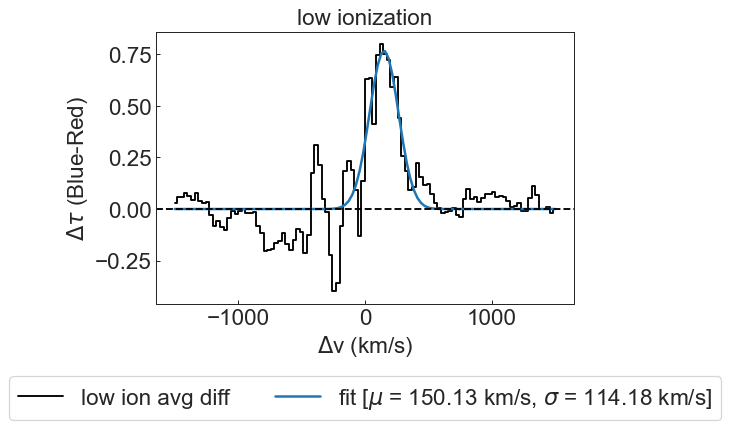

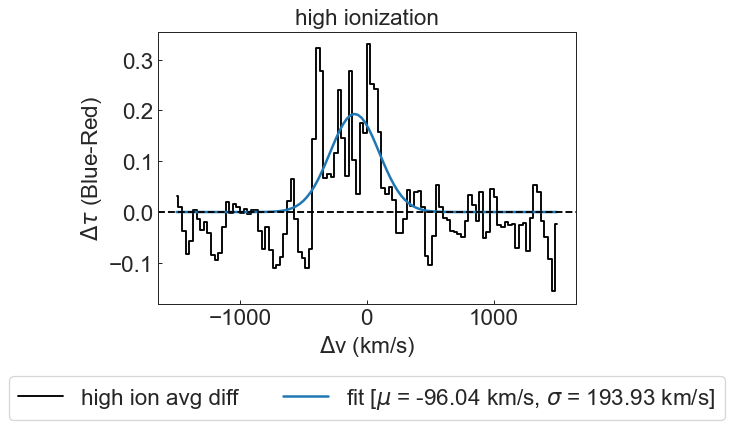

[  0.76666377 150.12516341 114.17921481] [ 1.93098621e-01 -9.60369371e+01  1.93929423e+02]


In [224]:
# new array to hold both the means of low and high ionization lines
od_mean = (np.nanmean(low_od[1],axis=0)-np.nanmean(low_od[0],axis=0),high_od[1]-high_od[0])

# define a single gaussian function to fit
def gaussian(x, A, mu, sig):
    return A * np.exp(-(x - mu)**2 / 2 / sig**2)

def gaussian(x, A, x0, sig):
    return A*np.exp(-(x-x0)**2/(2*sig**2))

# LOW ION PLOT
# --------------------------------------------------
popt,pcov = curve_fit(gaussian,xvals,od_mean[0],p0=[1,210,10]) # expected peak around 200
fit = gaussian(xvals.value,*popt)
low_ion_fit = popt

plt.figure(num=1,dpi=90)

plt.plot(xvals,od_mean[0],color='k',drawstyle='steps-mid',label='low ion avg diff') # low ionization
plt.plot(xvals,fit,label='fit [$\mu$ = %0.2f km/s, $\sigma$ = %0.2f km/s]'%(popt[1],popt[2]),lw=2) # fitted profile

plt.title('low ionization')
plt.ylabel(r'$\Delta \tau$ (Blue-Red)')
plt.xlabel(r'$\Delta$v (km/s)')
plt.axhline(0,color='k',ls='--')

plt.legend(bbox_to_anchor=(0.5, -0.47), loc='lower center', ncol=2)
plt.show()

# HIGH ION PLOT
# --------------------------------------------------
popt,pcov = curve_fit(gaussian,xvals,od_mean[1],p0=[1,0,100]) #expected peak around 200
fit = gaussian(xvals.value,*popt)
high_ion_fit = popt

plt.figure(num=2,dpi=90)

plt.plot(xvals,od_mean[1],color='k',drawstyle='steps-mid',label='high ion avg diff') # low ionization
plt.plot(xvals,fit,label='fit [$\mu$ = %0.2f km/s, $\sigma$ = %0.2f km/s]'%(popt[1],popt[2]),lw=2) #fitted profile

plt.title('high ionization')
plt.ylabel(r'$\Delta \tau$ (Blue-Red)')
plt.xlabel(r'$\Delta$v (km/s)')
plt.axhline(0,color='k',ls='--')

plt.legend(bbox_to_anchor=(0.5, -0.47), loc='lower center', ncol=2)
plt.show()

print(low_ion_fit,high_ion_fit)


In [225]:
# Check which lines might affect the difference from the optical depth vs rest wavelength plot above

# lines with relatively higher difference in optical depth

# 1063.9718  FeII_1063.9

# 1083.9900  NII_1084

# 1122.5260  FeIII_1122

'''blended'''
# 1133.6650  FeII_1133   
# 1134.1653  NI_1134.1
# 1134.4149  NI_1134.4
# 1134.9803  NI_1134.9



'''blended'''
# 1190.2080  SIII_1190
# 1190.4158  SiII_1190

# 1193.2897  SiII_1193

'''blended'''
# 1199.3910  MnII_1199
# 1199.5496  NI_1199

'''blended'''
# 1200.2233  NI_1200.2
# 1200.7098  NI_1200.7
# 1201.1180  MnII_1201

# 1207.0500  FeIII_1207

# 1260.4221  SiII_1260 (used to model the average profile)
# 1260.5330  FeII_1260

# 1302.1685  OI_1302 (used to model the average profile)

'''blended'''
# 1304.3702  SiII_1304 (used to model the average profile)
# 1304.8576  OI*_1304 (photospheric)

'''blended'''
# 1335.6627  CII*_1335.6 (photospheric)
# 1335.7077  CII*_1335.7 (photospheric)

'''blended'''
# 1393.3240  NiII_1393
# 1393.7550  SiIV_1393

dictum = OrderedDict([
    ('FeII_1063.9',1063.9718),
    ('NII_1084',1083.9900),
    ('FeIII_1122',1122.5260),
    ('FeII_1133',1133.6650),
    ('NI_1134.1',1134.1653),
    ('NI_1134.4',1134.4149),
    ('NI_1134.9',1134.9803),
    ('SIII_1190',1190.2080),
    ('SiII_1190',1190.4158),
    ('SiII_1193',1193.2897),
    # ('NI_1200.2',1200.2233),
    # ('NI_1200.7',1200.7098),
    # ('MnII_1201',1201.1180),
    ('FeIII_1207',1207.0500),
    # ('SiII_1260',1260.4221),
    # ('FeII_1260',1260.5330),
    ('OI_1302',1302.1685),
    # ('SiII_1304',1304.3702),
    # ('OI*_1304',1304.8576),
    # ('CII*_1335.6',1335.6627),
    # ('CII*_1335.7',1335.7077),
    # ('NiII_1393',1393.3240),
    # ('SiIV_1393',1393.7550)
])


#### 4.6| Model for Blended lines

In [226]:
# func "single" is used to return the gaussian for each of the abslines
# based on the fitted params before

def single(x,wave,amp,model):
    if model == 'high':
        mean = high_ion_fit[1] * u.km / u.s #get mean from the fit above
        sig = high_ion_fit[2] * u.km / u.s #get standard deviation
    if model == 'low':
        mean = low_ion_fit[1] * u.km / u.s #get mean from the fit above
        sig = low_ion_fit[2] * u.km / u.s #get standard deviation

    def gauss(x, A, x0, sig):
        return abs(A)*np.exp(-(x-x0)**2/(2*sig**2))
    
    corwave = (mean/c.c.to(u.km/u.s) + 1) * wave #get the corresponding wavelength
    corsig = sig / c.c.to(u.km/u.s) * wave #get the corresponding standard deviation

    return gauss(x,amp,corwave.value,corsig.value)

# fitter is used to fit the data, arg should be a dict or OrderedDict

def fitter(dictum):
    mask = np.isfinite(od[1]-od[0])
    masked_od = od[1][mask]-od[0][mask]
    masked_od_err = np.sqrt((od_err[0][mask])**2 + (od_err[1][mask])**2)
    def combine(x,*pars):
        g = np.zeros((len(dictum),(len(x)))) #initialize the array for each of the gaussians
        for ii in range(len(dictum)):
            wave, model = list(dictum.values())[ii]
            g[ii] = single(x,wave,pars[ii],model)
        sumg = np.sum(g,axis=0)
        return sumg

    guess = np.ones(len(dictum))
    popt, pcov = curve_fit(combine, nwavelength[mask].value, masked_od, guess)

    return(nwavelength[mask].value, masked_od, masked_od_err, combine(nwavelength[mask].value, *popt),popt,pcov)


##### 4.7.1| Visualizing the model

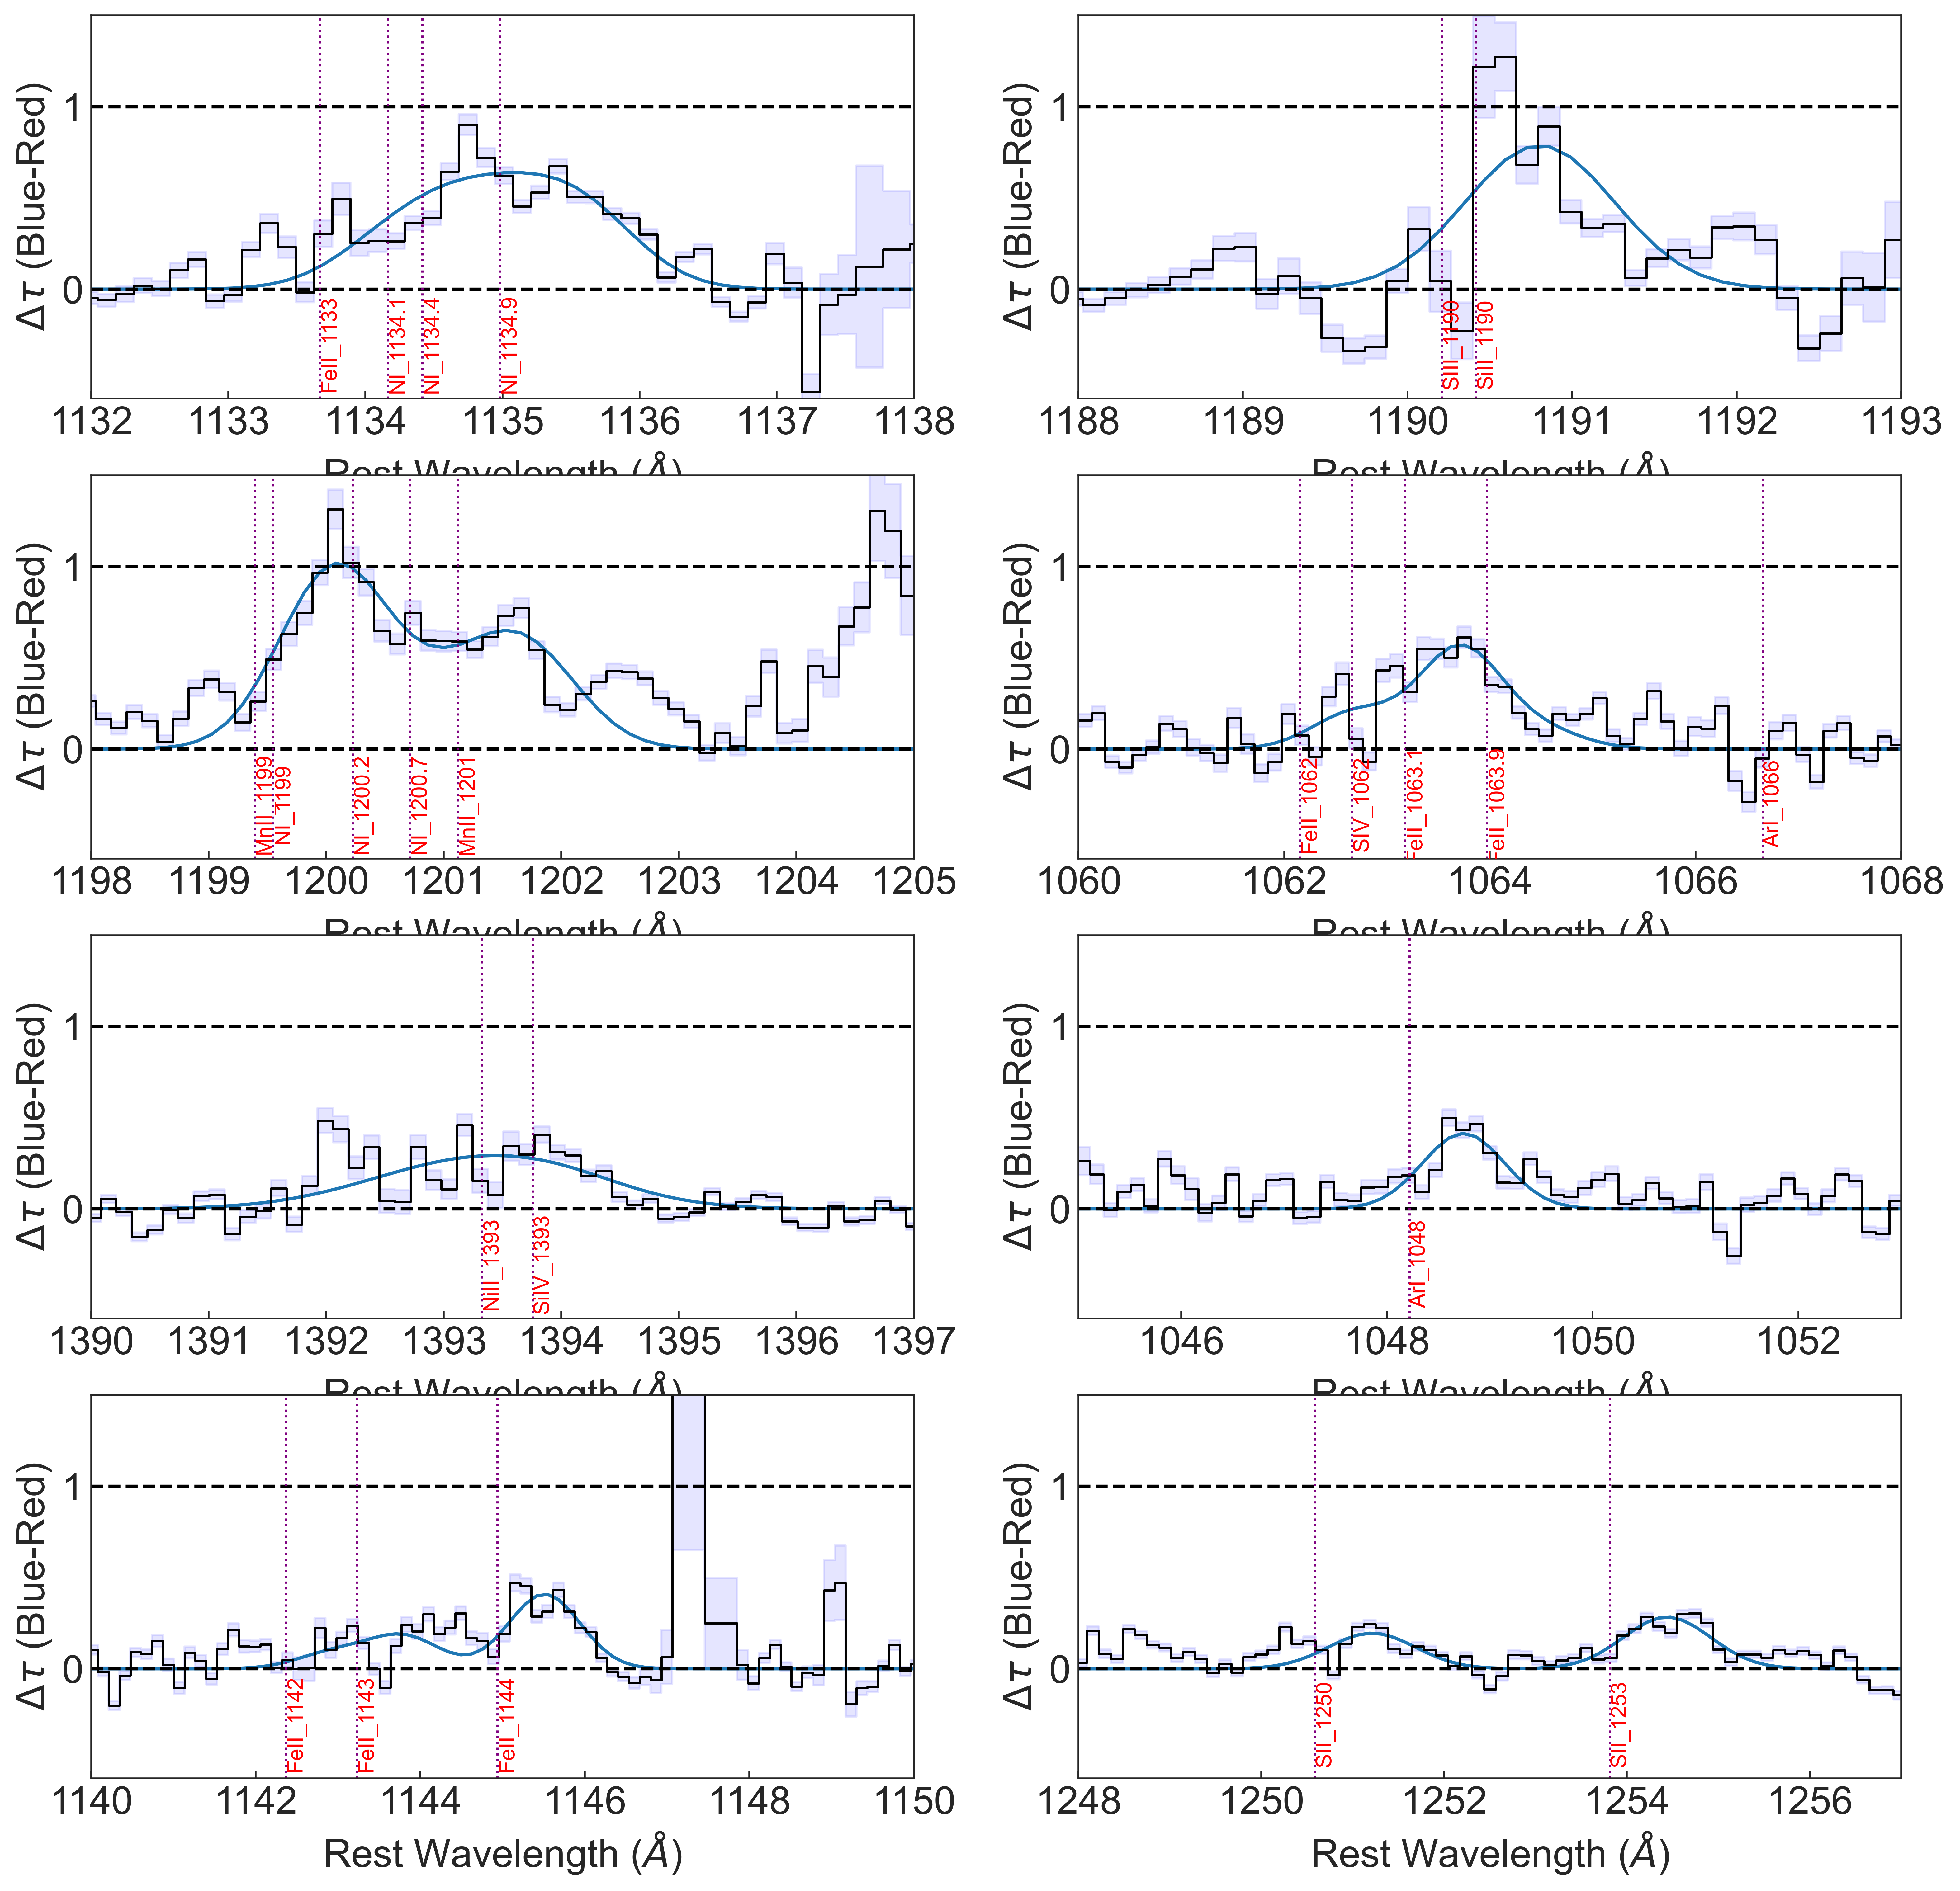

In [227]:
fig, ax = plt.subplots(4,2,figsize=(15,15),dpi=500)

ax = ax.flatten()
dictum = [dict() for i in range(8)]
dictum[0] = OrderedDict([
    ('FeII_1133',[1133.6650,'low']),
    ('NI_1134.1',[1134.1653,'low']),
    ('NI_1134.4',[1134.4149,'low']),
    ('NI_1134.9',[1134.9803,'low']),
])
ax[0].set_xlim(1132,1138)
dictum[1] = OrderedDict([
    ('SIII_1190',[1190.2080,'low']),
    ('SiII_1190',[1190.4158,'low']),
])
ax[1].set_xlim(1188,1193)
dictum[2] = OrderedDict([
    ('MnII_1199',[1199.3910,'low']),
    ('NI_1199',[1199.5496,'low']),
    ('NI_1200.2',[1200.2233,'low']),
    ('NI_1200.7',[1200.7098,'low']),
    ('MnII_1201',[1201.1180,'low']),
])
ax[2].set_xlim(1198,1205)
dictum[3] = OrderedDict([
    ('FeII_1062',[1062.1520,'low']),
    ('SIV_1062',[1062.6620,'high']),
    ('FeII_1063.1',[1063.1764,'low']),
    ('FeII_1063.9',[1063.9718,'low']),
])
ax[3].set_xlim(1060,1068)
dictum[4] = OrderedDict([
    ('NiII_1393',[1393.3240,'low']),
    ('SiIV_1393',[1393.7550,'high'])
])
ax[4].set_xlim(1390,1397)
dictum[5] = OrderedDict([
    ('ArI_1048',[1048.2199,'low']),
])
ax[5].set_xlim(1045,1053)
dictum[6] = OrderedDict([
    ('FeII_1142',[1142.3656,'low']),
    ('FeII_1143',[1143.2260,'low']),
    ('FeII_1144',[1144.9379,'low']),
])
ax[6].set_xlim(1140,1150)
dictum[7] = OrderedDict([
    ('SII_1250',[1250.5840,'low']),
    ('SII_1253',[1253.8110,'low']),

])
ax[7].set_xlim(1248,1257)

for i in range(len(dictum)):
    ax[i].plot(fitter(dictum[i])[0],fitter(dictum[i])[3],label = 'new fit')
    ax[i].plot(fitter(dictum[i])[0],fitter(dictum[i])[1], drawstyle="steps-mid", color='k', linewidth=1, label='Data')
    ax[i-1].fill_between(fitter(dictum[i])[0], fitter(dictum[i])[1]-fitter(dictum[i])[2], fitter(dictum[i])[1]+fitter(dictum[i])[2], step='mid', color = 'blue', alpha =0.1)

for i in range(len(dictum)):
    ax[i].axhline(1,color='k',ls='--')
    ax[i].set_ylim(-0.6,1.5)
    ax[i].set_ylabel(r'$\Delta \tau$ (Blue-Red)')
    ax[i].set_xlabel(r'Rest Wavelength ($\AA$)')
    ax[i].axhline(0,color='k',ls='--')

    for line in newlines.items():
        ax[i].axvline(line[1], linestyle=":", color="purple", lw=1)
        ax[i].text(line[1],-0.3, line[0],color="red",rotation=90, verticalalignment='center',clip_on=True)

Fe1063_dict = OrderedDict([
    ('FeII_1063.1',[1063.1764,'low']),
])


##### 4.7.2| Components of each complex

In [228]:
from specutils import Spectrum1D
from specutils.manipulation import gaussian_smooth
from scipy.stats import chisquare

def detailed(complex,x1,x2):
    # plt.figure(dpi=120)
    for line in newlines.items():
        plt.axvline(line[1], linestyle=":", color="purple", lw=1, alpha =0.5)
        plt.text(line[1],-0.3, line[0],color="red",rotation=90, verticalalignment='center',clip_on=True)
    plt.plot(fitter(complex)[0],fitter(complex)[3],label = 'fit')
    plt.plot(fitter(complex)[0],fitter(complex)[1], drawstyle="steps-mid", color='k', linewidth=1, label='Data')
    plt.fill_between(fitter(complex)[0], fitter(complex)[1]-fitter(complex)[2], fitter(complex)[1]+fitter(complex)[2], step='mid', color = 'grey', alpha =0.2)

    # trys = Spectrum1D(spectral_axis=fitter(complex)[0][x1:x2] * u.AA, flux=fitter(complex)[1][x1:x2] * u.m / u.m)
    # spec1_gsmooth = gaussian_smooth(trys, stddev=3)
    res = fitter(complex)[1][x1:x2]-fitter(complex)[3][x1:x2]
    ss_res = np.sum(res**2)
    ss_tot = np.sum((fitter(complex)[1][x1:x2]-np.mean(fitter(complex)[1][x1:x2]))**2)
    r_squared = 1 - (ss_res / ss_tot)

    # chisq = chisquare(fitter(complex)[1][x1:x2], f_exp = fitter(complex)[2][x1:x2])
    # plt.plot(fitter(complex)[0],spec1_gsmooth.flux, drawstyle="steps-mid", color='k', linewidth=1, label='Smoothed data')

    for j in range(len(complex)):
        A = fitter(complex)[4][j]
        err_sq = np.diag(fitter(complex)[5][j])
        # err_arr = np.around(np.sqrt(err_sq),3)
        err_arr = np.sqrt(err_sq)
        err = err_arr[j][j]
        plt.plot(fitter(complex)[0],single(fitter(complex)[0],list(complex.values())[j][0],
                                                    fitter(complex)[4][j],
                                                    list(complex.values())[j][1]),
                ls = '-',linewidth=2, label='%s(%.2e +/- %.2e)'%(list(complex.keys())[j], A, err))

    plt.ylabel(r'$\Delta \tau$ (Blue-Red)')
    plt.xlabel(r'Rest Wavelength ($\AA$)')
    plt.axhline(y=0, alpha = 0.5, color = 'k', ls='--')
    # plt.text(x1+3,1.2, chic,color="red",rotation=0, verticalalignment='center',clip_on=True)
    plt.xlim(x1,x2)
    # plt.xlim(1060,1068)
    # plt.xlim(1198,1205)
    # plt.xlim(1390,1397)
    # plt.xlim(1045,1053)
    plt.ylim(-0.8,1.5)
    plt.legend(bbox_to_anchor=(0.5, -0.22), loc='lower center', ncol=4)
    

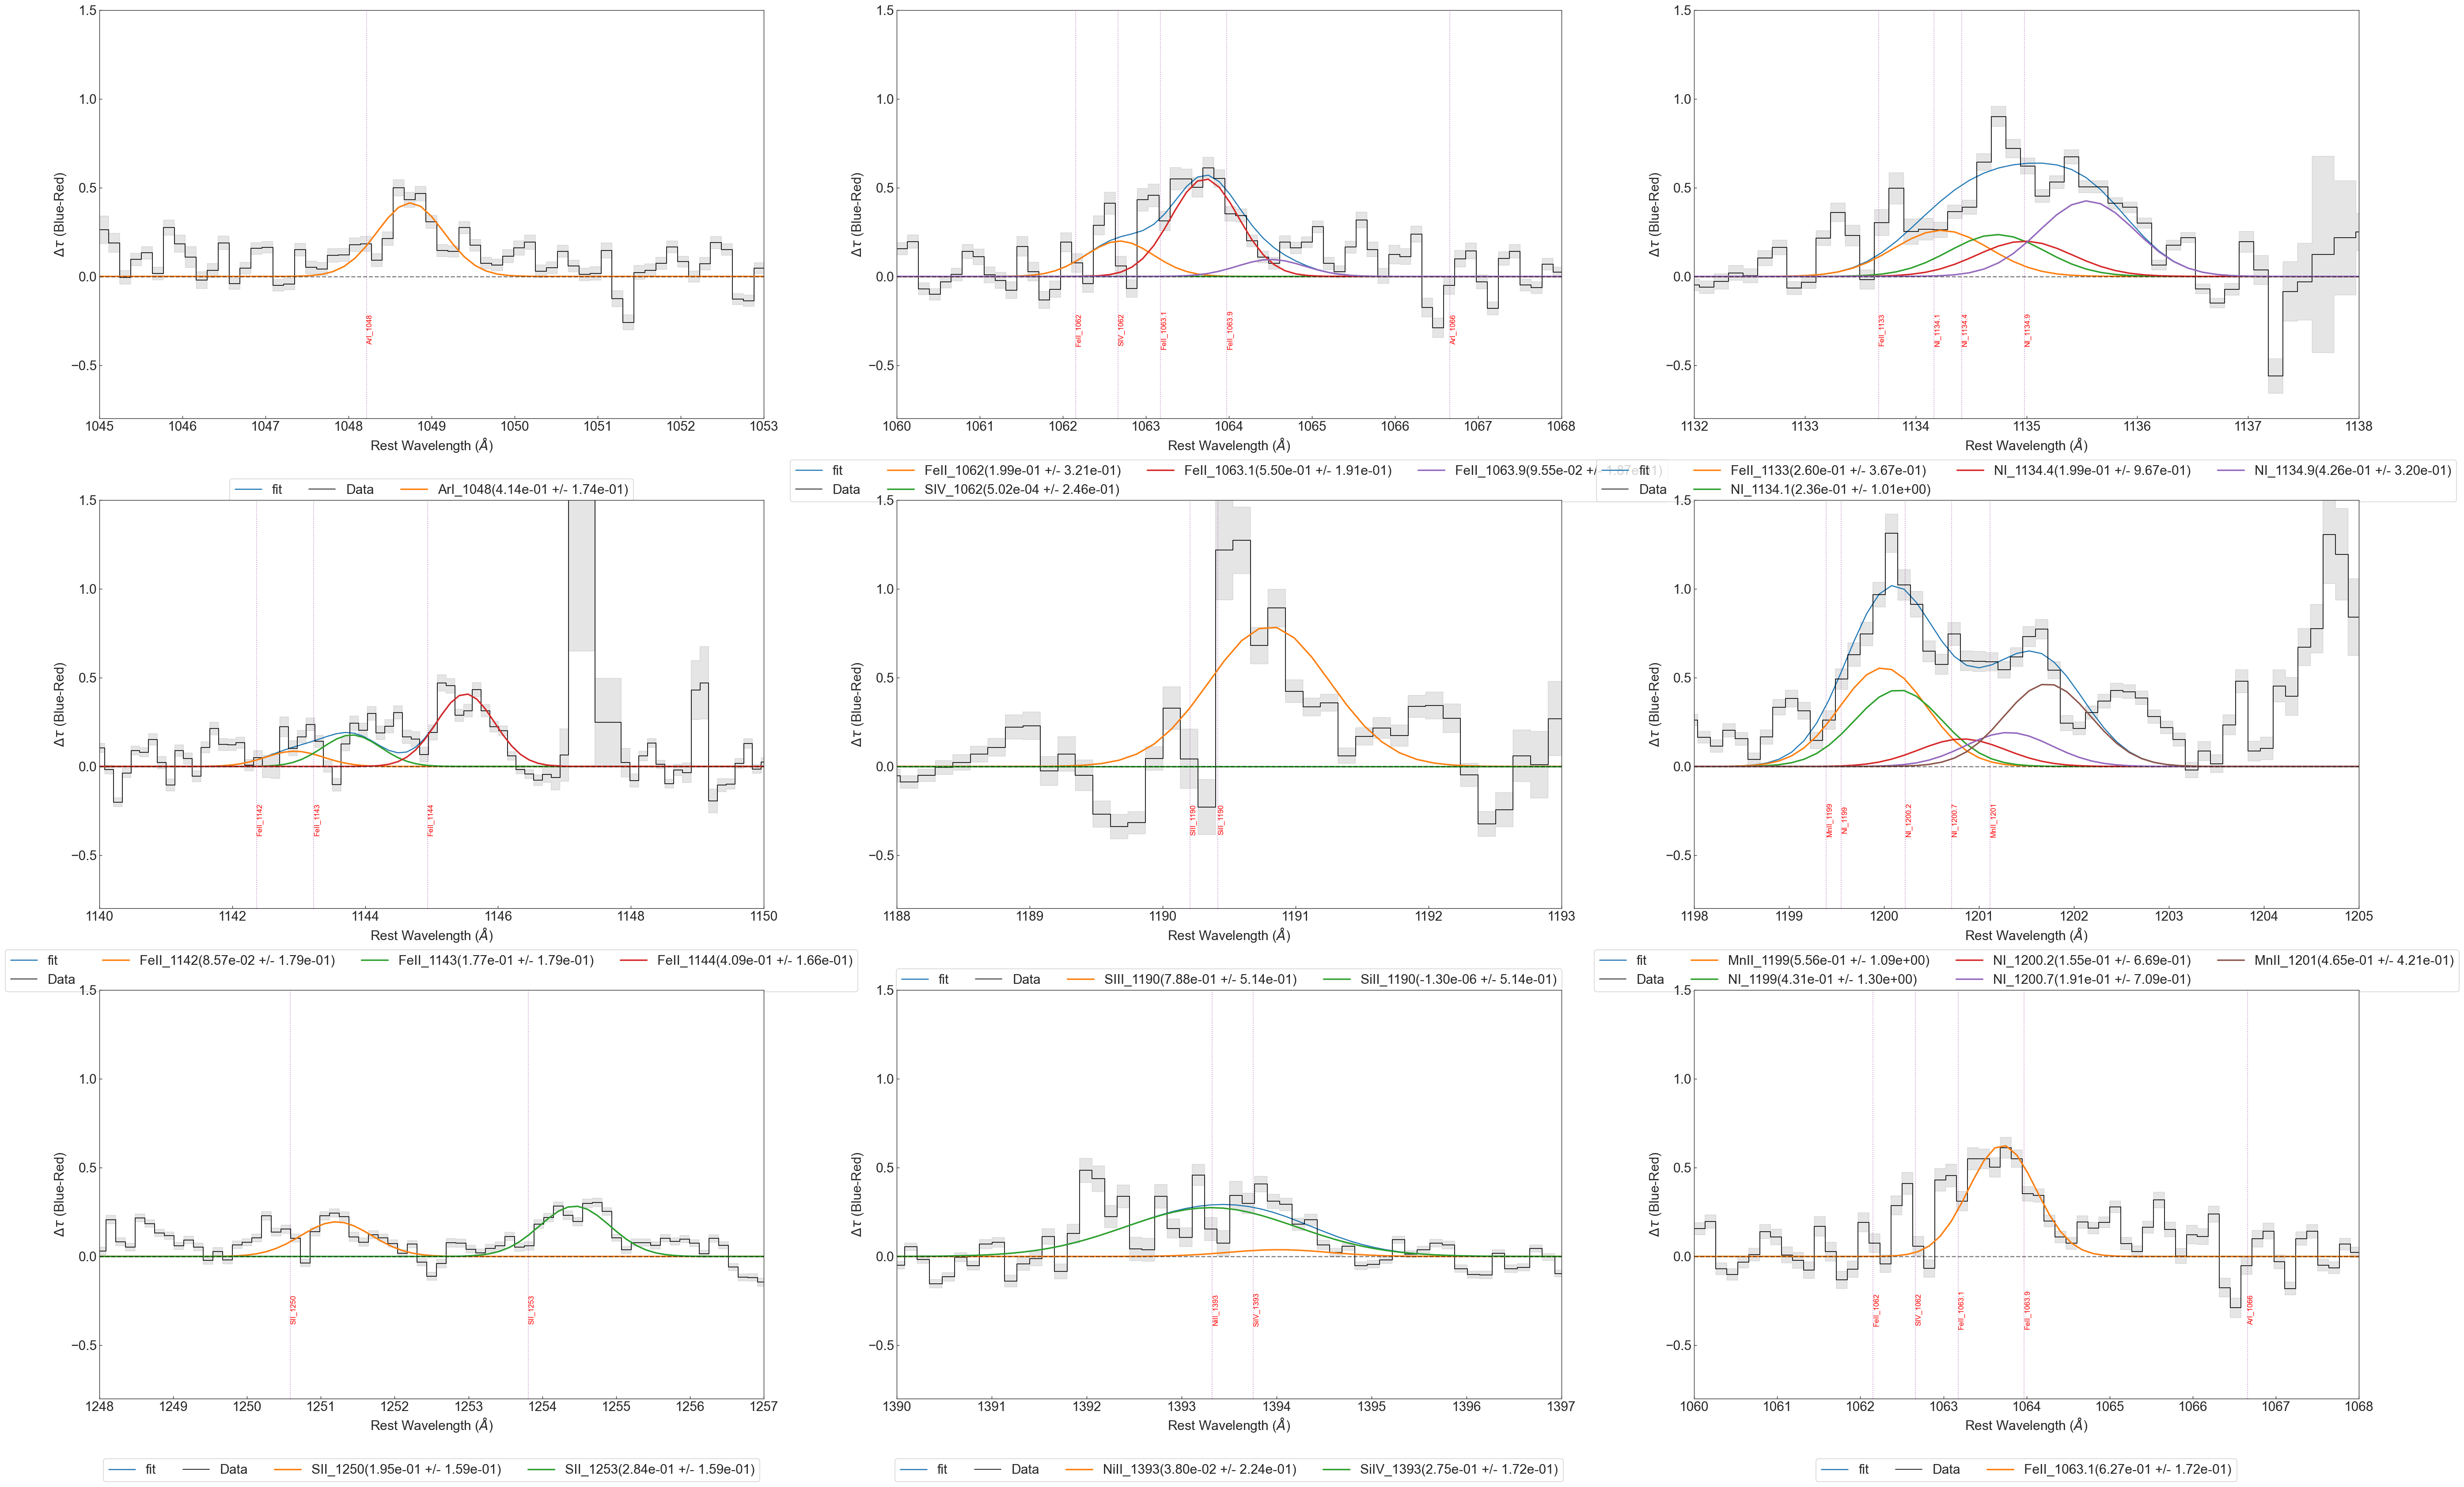

In [229]:
fig = plt.figure(figsize=(55,30),dpi=120)


ax1 = plt.subplot(331)
detailed(dictum[5],1045,1053)

ax2 = plt.subplot(332)
detailed(dictum[3],1060,1068)

ax3 = plt.subplot(333)
detailed(dictum[0],1132,1138)

ax4 = plt.subplot(334)
detailed(dictum[6],1140,1150)

ax5 = plt.subplot(335)
detailed(dictum[1],1188,1193)

ax6 = plt.subplot(336)
detailed(dictum[2],1198,1205)

ax7 = plt.subplot(337)
detailed(dictum[7],1248,1257)

ax8 = plt.subplot(338)
detailed(dictum[4],1390,1397)

ax9 = plt.subplot(339)
detailed(Fe1063_dict,1060,1068)

# plt.tight_layout()
plt.subplots_adjust(bottom=0.007, 
                    # right=0.9, 
                    # top=0.9, 
                    # wspace=0.4, 
                    )
plt.show()

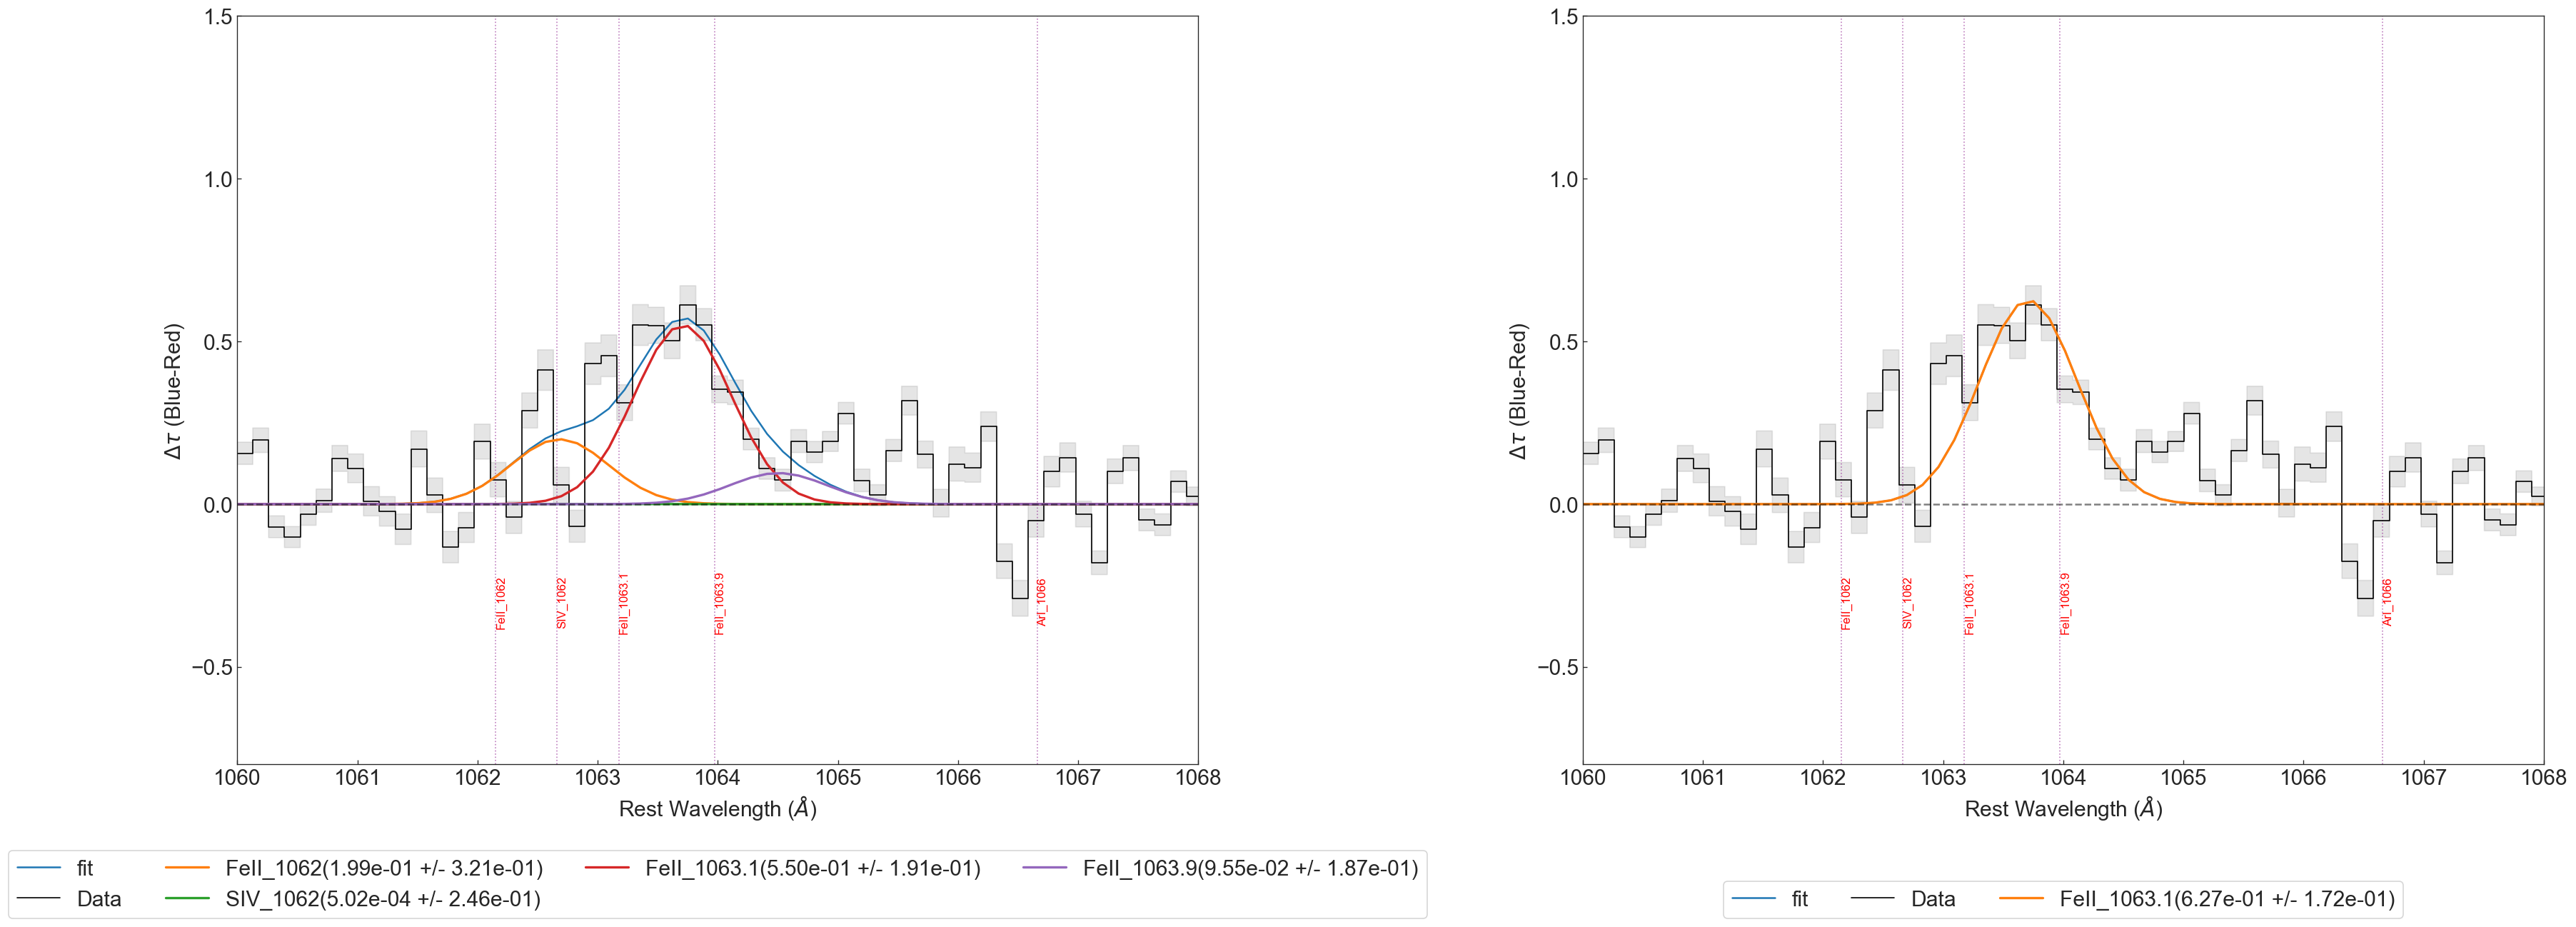

In [35]:
fig = plt.figure(
                figsize=(55,33),
                dpi=120)

ax1 = plt.subplot(331)
detailed(dictum[3],1060,1068)

ax2 = plt.subplot(332)
detailed(Fe1063_dict,1060,1068)

plt.subplots_adjust(bottom=0.0001, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    )
plt.show()

In [77]:
na1 = 3.768e14 * 0.55 / (1063.1764 * 5.47e-2) / u.cm / u.cm / u.km * u.s
e_na1 = 3.768e14 * 0.191 / (1063.1764 * 5.47e-2) / u.cm / u.cm / u.km * u.s 
na2 = 3.768e14 * 0.627 / (1063.1764 * 5.47e-2) / u.cm / u.cm / u.km * u.s
e_na2 = 3.768e14 * 0.172 / (1063.1764 * 5.47e-2) / u.cm / u.cm / u.km * u.s


f"{na1.value:.3e} +/- {e_na1:.3e}"
f"{na2.value:.3e} +/- {e_na2:.3e}"



'4.062e+12 +/- 1.114e+12 s / (cm2 km)'

In [51]:
# Fe transition and corresponding column density
#  Dict format : Name , [wavelength, f-value, difference in opt_dep, err]
Fe_dict = OrderedDict([
    ('FeII_1062',[1062.1520, 3.8020e-03, 3.27e-7, 0.459]),
    ('FeII_1063.9',[1063.9718, 3.7000e-03, 2.14e-1, 0.179]),
    ('FeII_1133',[1133.6650, 5.5000e-03, 2.6e-1, 0.367]),
    ('FeII_1142',[1142.3656, 4.2000e-03, 8.57e-2, 0.179]),
    ('FeII_1143',[1143.2260, 1.7700e-02, 1.77e-1, 0.179]),
    ('FeII_1144',[1144.9379, 1.0600e-01, 4.09e-1, 0.168]),
])

for i in Fe_dict.items():
    N_a = 3.768e14 * i[1][2] / (i[1][0] * i[1][1]) / u.cm / u.cm / u.km * u.s
    err_N = 3.768e14 * i[1][3] / (i[1][0] * i[1][1]) / u.cm / u.cm / u.km * u.s
    # print('%s = %.2e +/- %.3e'%(i[0], N_a.value, err_N.value))
    Fe_dict.update({i[0]:[i[1][0], i[1][1], i[1][2], i[1][3], N_a, err_N]})

# ----------------------------------------------------------------------------------

# Nitrogen transition and corresponding column density
#  Dict format : Name , [wavelength, f-value, opt_dep, err]
N_dict = OrderedDict([
    ('NI_1134.1',[1134.1653, 1.3420e-02, 2.36e-1, 1.014]),
    ('NI_1134.4',[1134.4149, 2.6830e-02, 1.99e-1, 0.967]),
    ('NI_1134.9',[1134.9803, 4.0230e-02, 4.26e-1, 0.32]),
    ('NII_1393',[1393.3240, 1.0090e-02, 3.8e-2, 0.224]),
])

for i in N_dict.items():
    N_a = 3.768e14 * i[1][2] / (i[1][0] * i[1][1]) / u.cm / u.cm / u.km * u.s
    err_N = 3.768e14 * i[1][3] / (i[1][0] * i[1][1]) / u.cm / u.cm / u.km * u.s
    # print('%s = %.2e +/- %.3e'%(i[0], N_a.value, err_N.value))
    N_dict.update({i[0]:[i[1][0], i[1][1], i[1][2], i[1][3], N_a, err_N]})


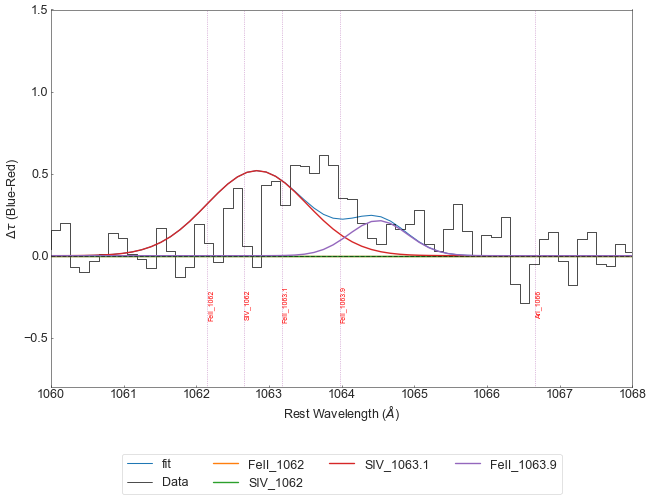

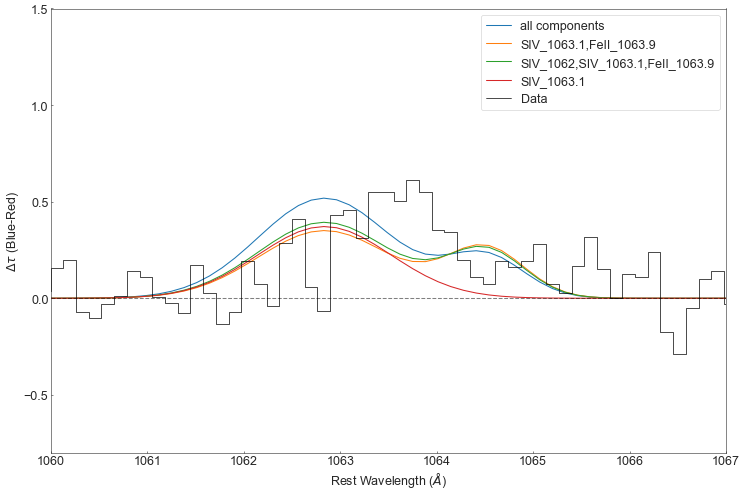

In [72]:
# For the range [1060,1068]
fig = plt.figure(num=1,figsize=(15,10),dpi=50)

# ax1 = plt.subplot(221)
detailed(dictum[3],1060,1068)
dictum_1060 = [dict() for i in range(8)]
dictum_1060[0] = OrderedDict([
    # ('FeII_1062',[1062.1520,'low']),
    # ('SIV_1062',[1062.6620,'high']),
    ('SIV_1063.1',[1063.1764,'high']),
    ('FeII_1063.9',[1063.9718,'low']),
])

dictum_1060[1] = OrderedDict([
    # ('FeII_1062',[1062.1520,'low']),
    ('SIV_1062',[1062.6620,'high']),
    ('SIV_1063.1',[1063.1764,'high']),
    ('FeII_1063.9',[1063.9718,'low']),
])

dictum_1060[2] = OrderedDict([
    # ('FeII_1062',[1062.1520,'low']),
    # ('SIV_1062',[1062.6620,'high']),
    ('SIV_1063.1',[1063.1764,'high']),
    # ('FeII_1063.9',[1063.9718,'low']),
])
fig = plt.figure(num=2,figsize=(15,10),dpi=50)
# ax2 = plt.subplot(223)
plt.plot(fitter(dictum[3])[0],fitter(dictum[3])[2],label = 'all components')
plt.plot(fitter(dictum_1060[0])[0],fitter(dictum_1060[0])[2],label = 'SIV_1063.1,FeII_1063.9')
plt.plot(fitter(dictum_1060[1])[0],fitter(dictum_1060[1])[2],label = 'SIV_1062,SIV_1063.1,FeII_1063.9')
plt.plot(fitter(dictum_1060[2])[0],fitter(dictum_1060[2])[2],label = 'SIV_1063.1')
plt.ylabel(r'$\Delta \tau$ (Blue-Red)')
plt.xlabel(r'Rest Wavelength ($\AA$)')

plt.plot(fitter(dictum_1060[0])[0],fitter(dictum_1060[0])[1], drawstyle="steps-mid", color='k', linewidth=1, label='Data')
plt.axhline(y=0, alpha = 0.5, color = 'k', ls='--')
plt.xlim(1060,1067)
plt.ylim(-0.8,1.5)
plt.legend()
plt.tight_layout()

a
